<a href="https://colab.research.google.com/github/AngieS23/labs_machine_learning/blob/main/lab2_supervised_learning/Laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio #2**

### Estudiantes:
+ Luis David Solano Santamaría - C17634
+ Angie Solís Manzano - C17686

## Configuración del ambiente

In [ ]:
import ipywidgets as widgets
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from IPython.display import display
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process import kernels

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AngieS23/labs_machine_learning/refs/heads/main/lab2_supervised_learning/winequality-red.csv", sep=';')

## Preprocesamiento de datos

Para este laboratorio, se utiliza el conjunto de datos de [1].

Este es un conjunto de datos que contiene diversa información de pruebas químicas realizadas sobre vino en el norte de Portugal. El conjunto de datos incluye información tanto de vino tinto como blanco.

Como respuesta a estas pruebas químicas, a cada *sample* de vino se le asigna una calidad.

### Análisis inicial del conjunto de datos

In [ ]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
data.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A primera vista, por medio de las funciones anteriores, podemos observar que tenemos 12 columnas en el conjunto de datos, de las cuales todas son númericas.

Esto nos da a entender que vamos a tener que considerar la posibilidad de normalizar los datos, tomar en cuenta valores atípicos y reemplazar valores nulos para estos.

Las primeras 11 columnas ofrecen los datos recolectados de las pruebas químicas realizadas sobre cada *sample* de vino, mientras que la última representa la calidad asignada. De esta manera, la columna *quality* ofrece la posibilidad de ser nuestra `y` para el modelo, que nos permite entonces dada esta información crear un clasificador de la calidad del vino.

Por medio del `tail` y `head` parece ser, a primera vista, que predominan valores de calidad 5 y 6, pero esto tendrá que ser observado a profundiad posteriormente.



In [ ]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Podemos observar que en total tenemos 1599 entradas sobre las cuales vamos a trabajar. Ya sea para el modelo o para ser eliminadas.

El conjunto de datos no provee las unidades directas para cada entrada, pero se va a intentar obtener un mayor comprendimiento de lo que representan.

De esta manera, entendiendo un poco sobre las columnas que se tienen para tomar decisiones osbre ellas:

1. El ácido fijo se mantiene líquido al hervir el vino [2]. Este parece tomar un valor mínimo alrededor de 4 y un máximo alrededor de 16. Los valores promedian alrededor de 8.
2. El segundo tipo de ácido que poseemos es el volátil. El ácido de este tipo se evapora al hervir el vino, este en la teoría presenta valores menores que el ácido fijo [2]. Observando un poco las mediciones, sus valores rondan alrededor de 0.1 y 1.6, efectivamente siendo menores. El 50% de estos valores andan alrededor de 0.52.
3. El ácido cítrico es un componente órganico que se encuentra en cantidades bajas en las uvas, se reporta que dentro de Europa, este se regula para que no exceda 1g/L [3]. Aunque se desconoce la unidad utilizada para el conjunto de datos, podemos notar que su máximo es 1. Un 75% de los datos para este valor se encuentran alrededor de 0.42, en contraste al primer ácido observado sus cantidades son menores lo cual respalda la teoría.
4. El azúcar residual en el vino se refiere al azúcar restante en el vino de las uvas. Según la dulzura del vino este puede tomar varios rangos, asumiendo que se utilizan gramos por litro para las mediciones, las mediciones son sobre vino llamado seco [4]. Las mediciones están entre 0.9 y 15.5, lo cual corresponde con esta clasificación.
5. En el caso de los cloruros en el vino, de acuerdo a [5], como regla general estos mantienen un valor bajo, pero dependen de su zona. Esto corresponde a los datos observados.
6. El dióxido de azufre libre se utiliza para proteger el vino de oxidación [6]. En este caso podemos ver que toma un gran rango de valores, desde 1ppm hasta 72ppm. La media de estos datos se encuentra alrededor de 15, por lo que algunos podrían ser considerados atípicos y eliminados.
7. El dióxido de azufre libre total toma en cuenta la porción que está libre y la que está pegada a otros químicos en el vino [7]. Su valor máximo para una botella de vino es de 350ppm, en nuestro caso tenemos un valor máximo de 289.
8. La densidad del vino se utiliza en el proceso de fermentación y lleva a obtener el nivel de alcohol final. Permite controlar cuánto azúcar está presente en este [8]. Para este caso, parece ser que todos los vinos se encuentran similarmente densos.
9. La mayoría del vino mantiene un pH alrededor de 3 y 4 [6], esto es consistente con lo visto con los datos.
10. Los sulfatos representan sales en los vinos [7]. Estos tienen una media de 0.66 y su valor máximo es 2.
11. El alcohol presentado en el vino ronda del 8% al 14%, esto está según lo esperado.
12. Finalmente, podemos observar que la calidad del vino en promedio está alrededor de 5.6 y 75% de sus datos se encuentran en una calidad alrededor de 6. Podría ser que se tengan clases desbalanceadas según este problema, si es que se desean clasificar todas.




In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Se puede notar que para todas las columnas del conjunto de datos, ninguna presenta valores nulos. Por lo que no se requiere utilizar técnicas para reemplazar estos.

### Manejo de valores atípicos

Aunque se puede asumir la unidad sobre la cuál se están trabajando los datos, el conjunto de datos no nos indica esto de manera específica. Por esta razón, se va a decidir borrar los valores atípicos encontrados.

En caso de que el resultado no sea satisfactorio, se considerará mantener los valores atípicos para otro experimento.

In [ ]:
numeric_attributes = data.select_dtypes([np.number]).columns.to_list()
numeric_attributes.remove('quality')

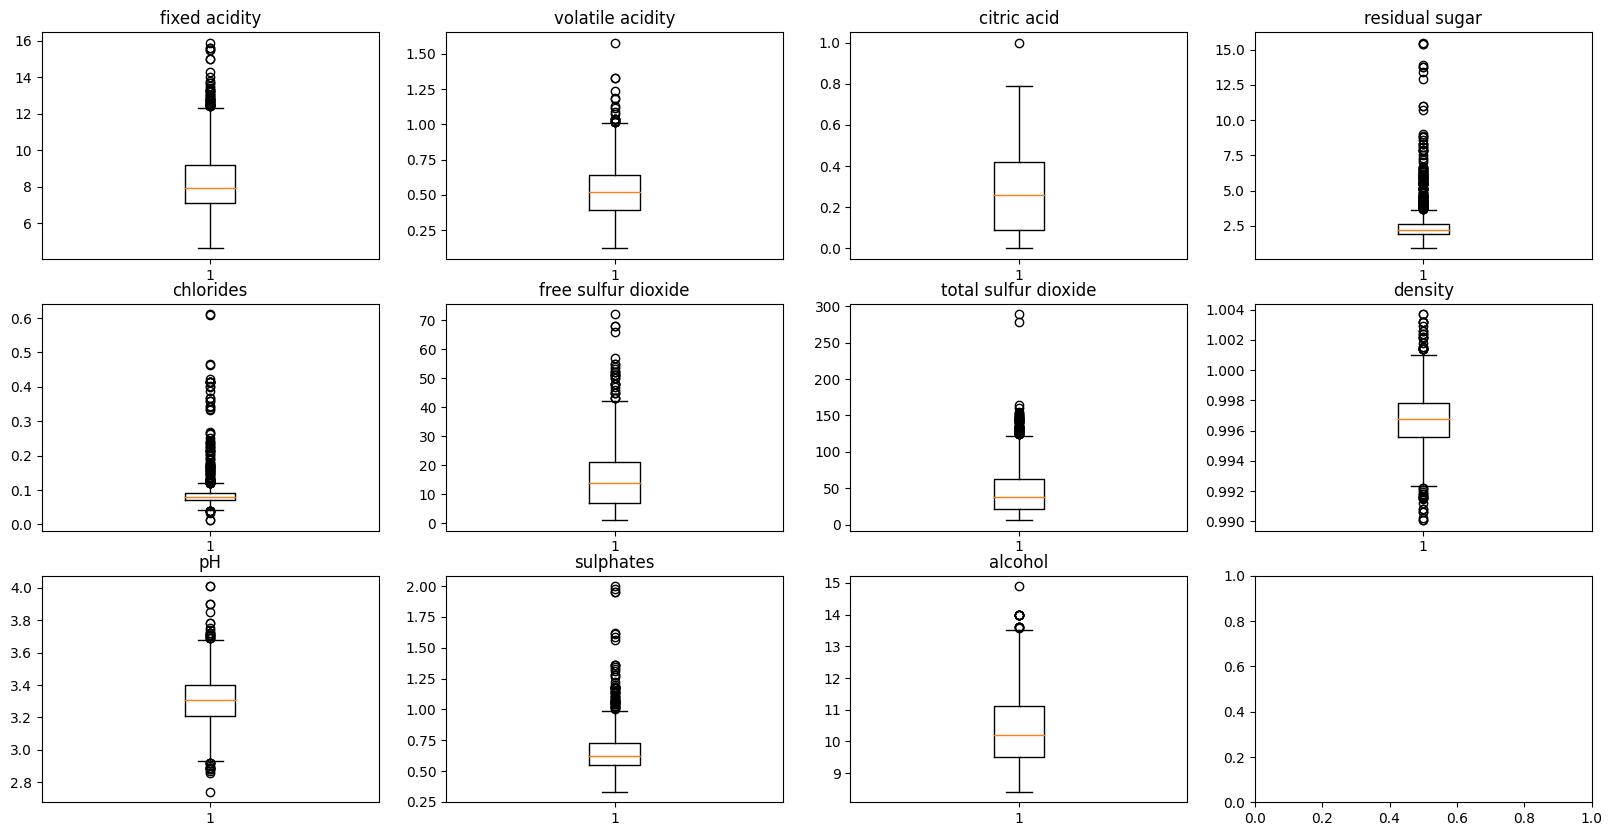

In [ ]:
fig, axis = plt.subplots(3, 4)
fig.set_figheight(10)
fig.set_figwidth(20)

attribute = 0
for r in range(0, 3):
  for c in range(0, 4):
    if attribute != len(numeric_attributes):
      axis[r,c].boxplot(data[numeric_attributes[attribute]])
      axis[r,c].set_title(numeric_attributes[attribute])
      attribute += 1

plt.show()

In [ ]:
data_b = data.copy()
len(data_b)

1599

De esta manera, se van a eliminar los datos que se consideren atípicos según su rango intercuartílico y se guardará en una copia del conjunto de datos original.

In [ ]:
for attribute in numeric_attributes:
  Q1 = data_b[attribute].quantile(0.25)
  Q3 = data_b[attribute].quantile(0.75)
  IQR = Q3-Q1
  limit = 1.5
  outliers = data_b[(data_b[attribute] < Q1-limit*IQR) | (data_b[attribute] > Q3+limit*IQR)]
  print(str(len(outliers)) + " of \'" + attribute + "\' where eliminated")
  data_b = data_b.drop(outliers.index)

49 of 'fixed acidity' where eliminated
20 of 'volatile acidity' where eliminated
1 of 'citric acid' where eliminated
138 of 'residual sugar' where eliminated
102 of 'chlorides' where eliminated
25 of 'free sulfur dioxide' where eliminated
51 of 'total sulfur dioxide' where eliminated
27 of 'density' where eliminated
20 of 'pH' where eliminated
26 of 'sulphates' where eliminated
5 of 'alcohol' where eliminated


In [ ]:
len(data_b)

1135

Aunque el conjunto de datos original era de mayor tamaño, se ve favorable trabajar con esta cantidad de entradas en el conjunto de datos.

### Estandarización de los datos

Se va a observar un poco las distribuciones de diversas variables numéricas, para ver si se aproximan un poco a la distribución normal.

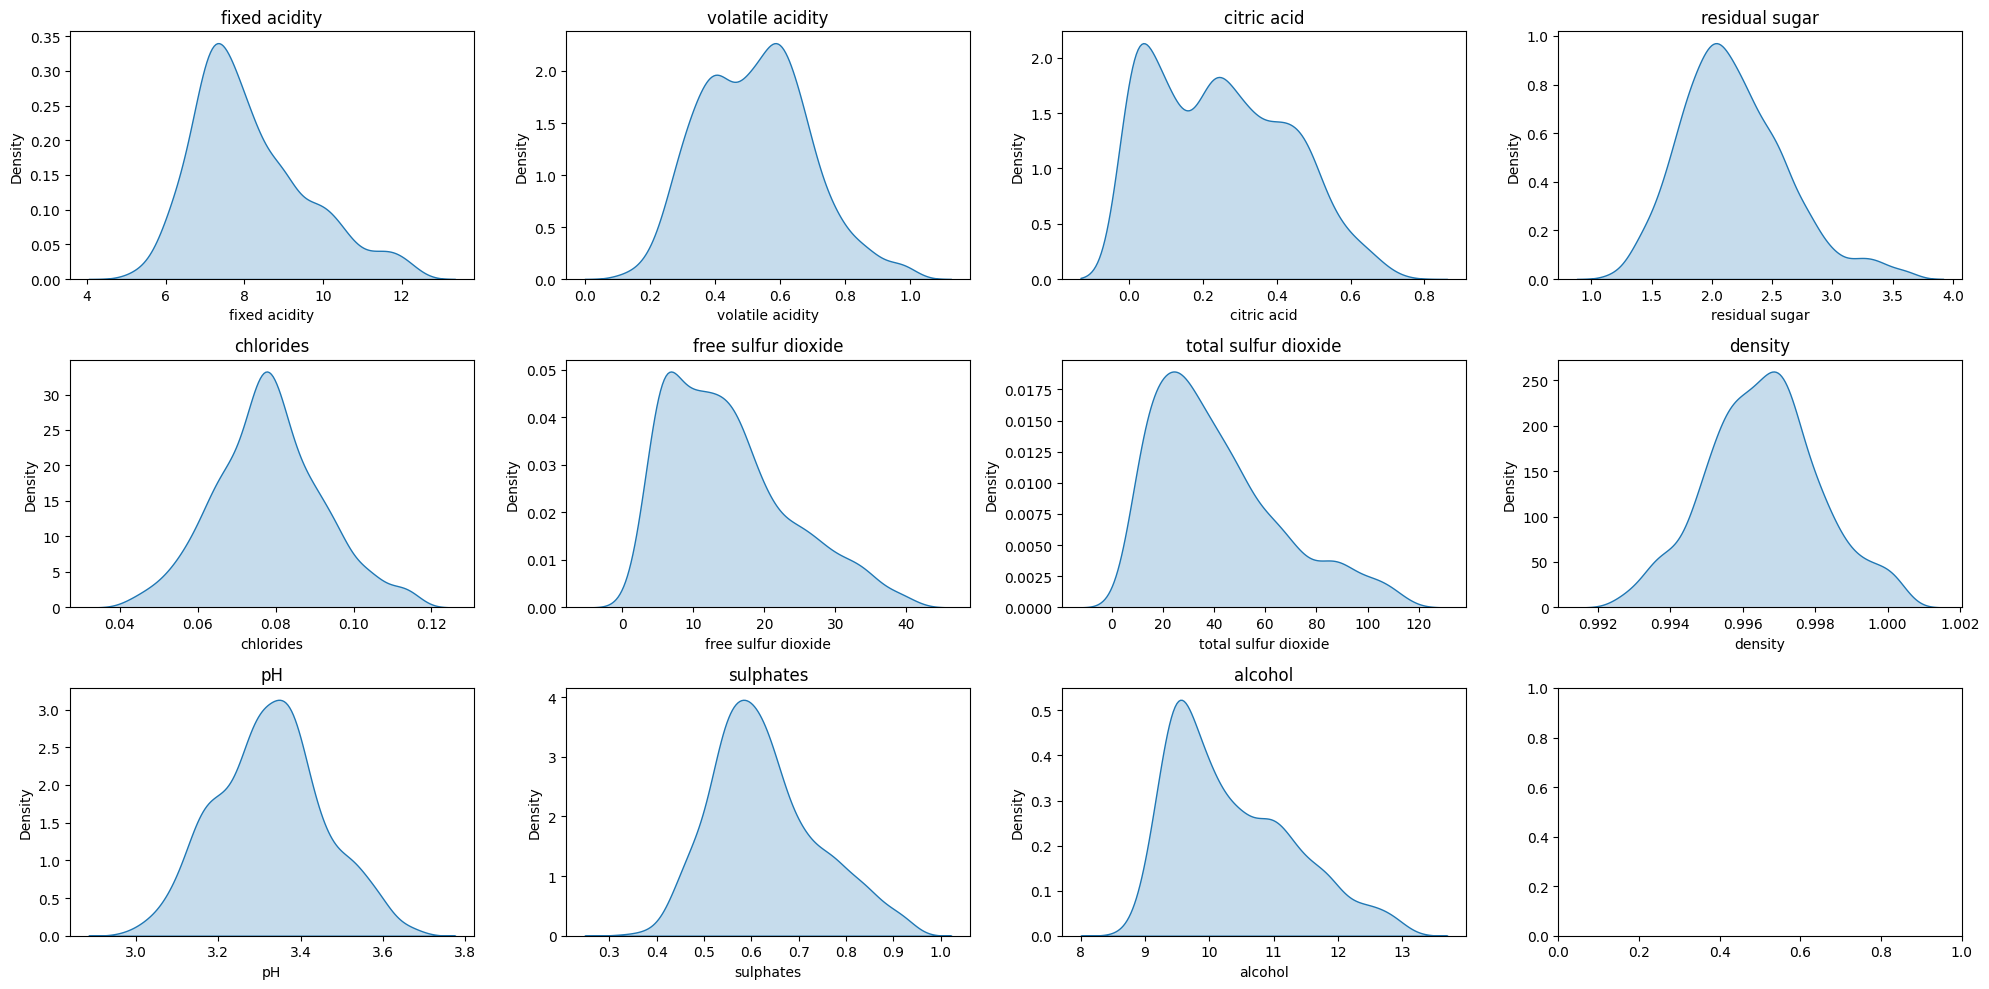

In [ ]:
fig, axis = plt.subplots(3, 4)
fig.set_figheight(10)
fig.set_figwidth(20)

attribute = 0
for f in range(3):
  for c in range(4):
    if attribute != len(numeric_attributes):
        sns.kdeplot(data=data_b[numeric_attributes[attribute]], ax=axis[f, c], fill=True)
        axis[f, c].set_title(numeric_attributes[attribute])
        attribute += 1

plt.tight_layout()
plt.show()


Ya que la distribucion de la mayoría de los datos se asemeja ser normal y el resto no se aleja de esta, se va a aplicar un `StandardScaler` sobre los datos. Para esto se va a crear otra copia del conjunto de datos que guarde este procedimiento.

In [ ]:
standarizer = StandardScaler()
data_c = data_b.copy()
data_c[numeric_attributes] = standarizer.fit_transform(data_c[numeric_attributes])

<Axes: ylabel='Density'>

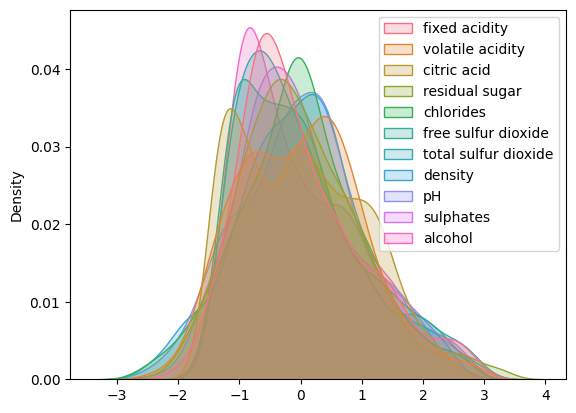

In [ ]:
sns.kdeplot(data_c[numeric_attributes], fill=True)

Podemos observar la densidad de todas las variables sobrelapadas entre sí, la densidad que más destaca es la del ácido cítrico que no presentaba una curva similar a la distribución normal desde un inicio.

Posteriormente se podría considerar normalizar en vez de utilizar un procedimiento de estandarización.

### Observación sobre el balanceo de datos

<Axes: ylabel='quality'>

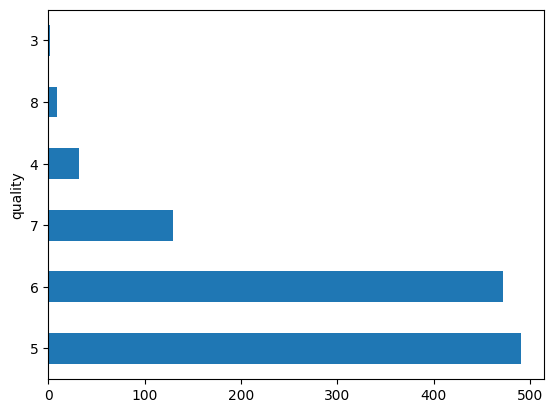

In [ ]:
value_counts = data_b['quality'].value_counts()
value_counts.plot.barh()

Al observar la visualización anterior, se puede notar que existe una alta concentración de vinos con una calidad de 5 y 6, mientras que otros tipos están mucho menos presentes.

Por esta razón, se debe plantear un problema que busque utilizar datos balanceados para el modelo.

### Correlación de características

Se va a calcular la matriz de correlación y mostrar como un mapa de calor para los datos.

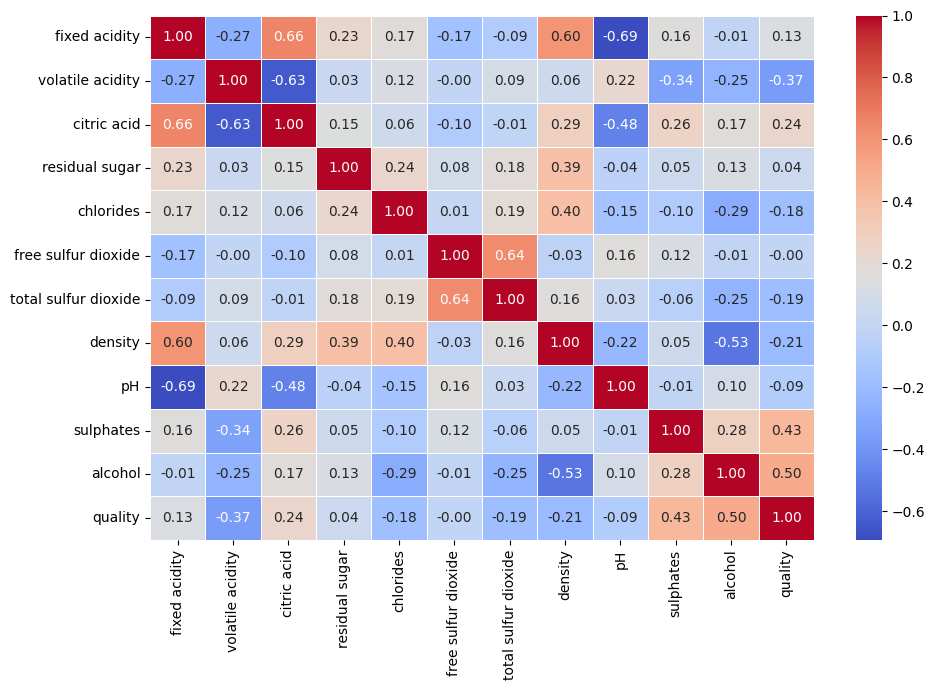

In [ ]:
correlation_matrix = data_c.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5, annot_kws = {"size": 10})
plt.tight_layout()
plt.show()

Tomando como correlación fuerte cualquier valor que se encuentre mayor $0.7$ o menor a $-0.7$ parece ser que solo la ácidez fija junto con el pH parecen acercarse a una correlación negativa fuerte.

Se va a observar un poco más de cerca esta correlación por medio de un `scatterplot`.



#### *Fixed acidity* y pH

<Axes: xlabel='fixed acidity', ylabel='pH'>

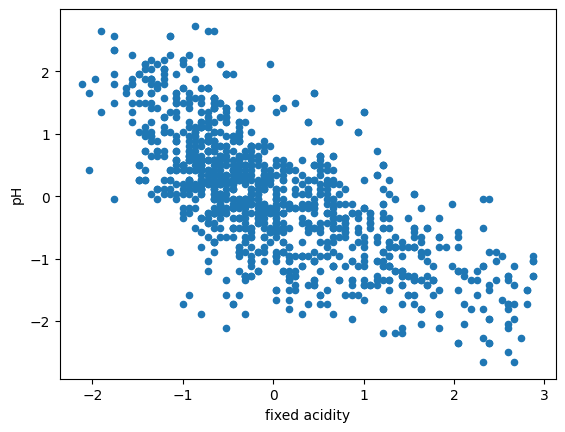

In [ ]:
data_c.plot(x='fixed acidity', y='pH', kind='scatter')

Aquí se puede observar de manera más clara cómo es que cuando la ácidez fija crece, el pH respectivamente baja.

## Experimento - Agrupación binaria de los vinos

Debido al desbalanceo de clases, se realizará una agrupación binaria de los vinos entre buena calidad y mala calidad.

### Reorganización del conjunto de datos

Primero, se debe analizar cuál sería un buen punto de corte para lograr que las clases obtenidas sean satisfactorias.

In [ ]:
data_d = data_c.copy()
data_d['quality'].value_counts()

quality
5    490
6    472
7    130
4     32
8      9
3      2
Name: count, dtype: int64

Al analizar los datos, se puede observar que un buen punto de corte para definir el "buen" vino del "malo" es 5. Las calidades menores o iguales a `5` serán clasificadas como mal vino. Asimismo, las calidades mayores a 5 serán consideradas buenas.

En el conjunto de datos, se reemplazan las calidades malas con un `0` y las calidades buenas con un `1`.

In [ ]:
data_d['quality'] = np.where(data_d['quality'] <= 5, 0, 1)
data_d['quality'].value_counts()

quality
1    611
0    524
Name: count, dtype: int64

Después del cambio, las clases están mucho más balanceadas que antes y se tiene un buen conjunto de datos para comenzar la experimentación de los modelos.

Antes de comenzar la experimentación, se quiso visualizar si existe alguna división clara entre las clases para los *features*. Por ello, se realizó la visualizacion que se muestra a continuación:

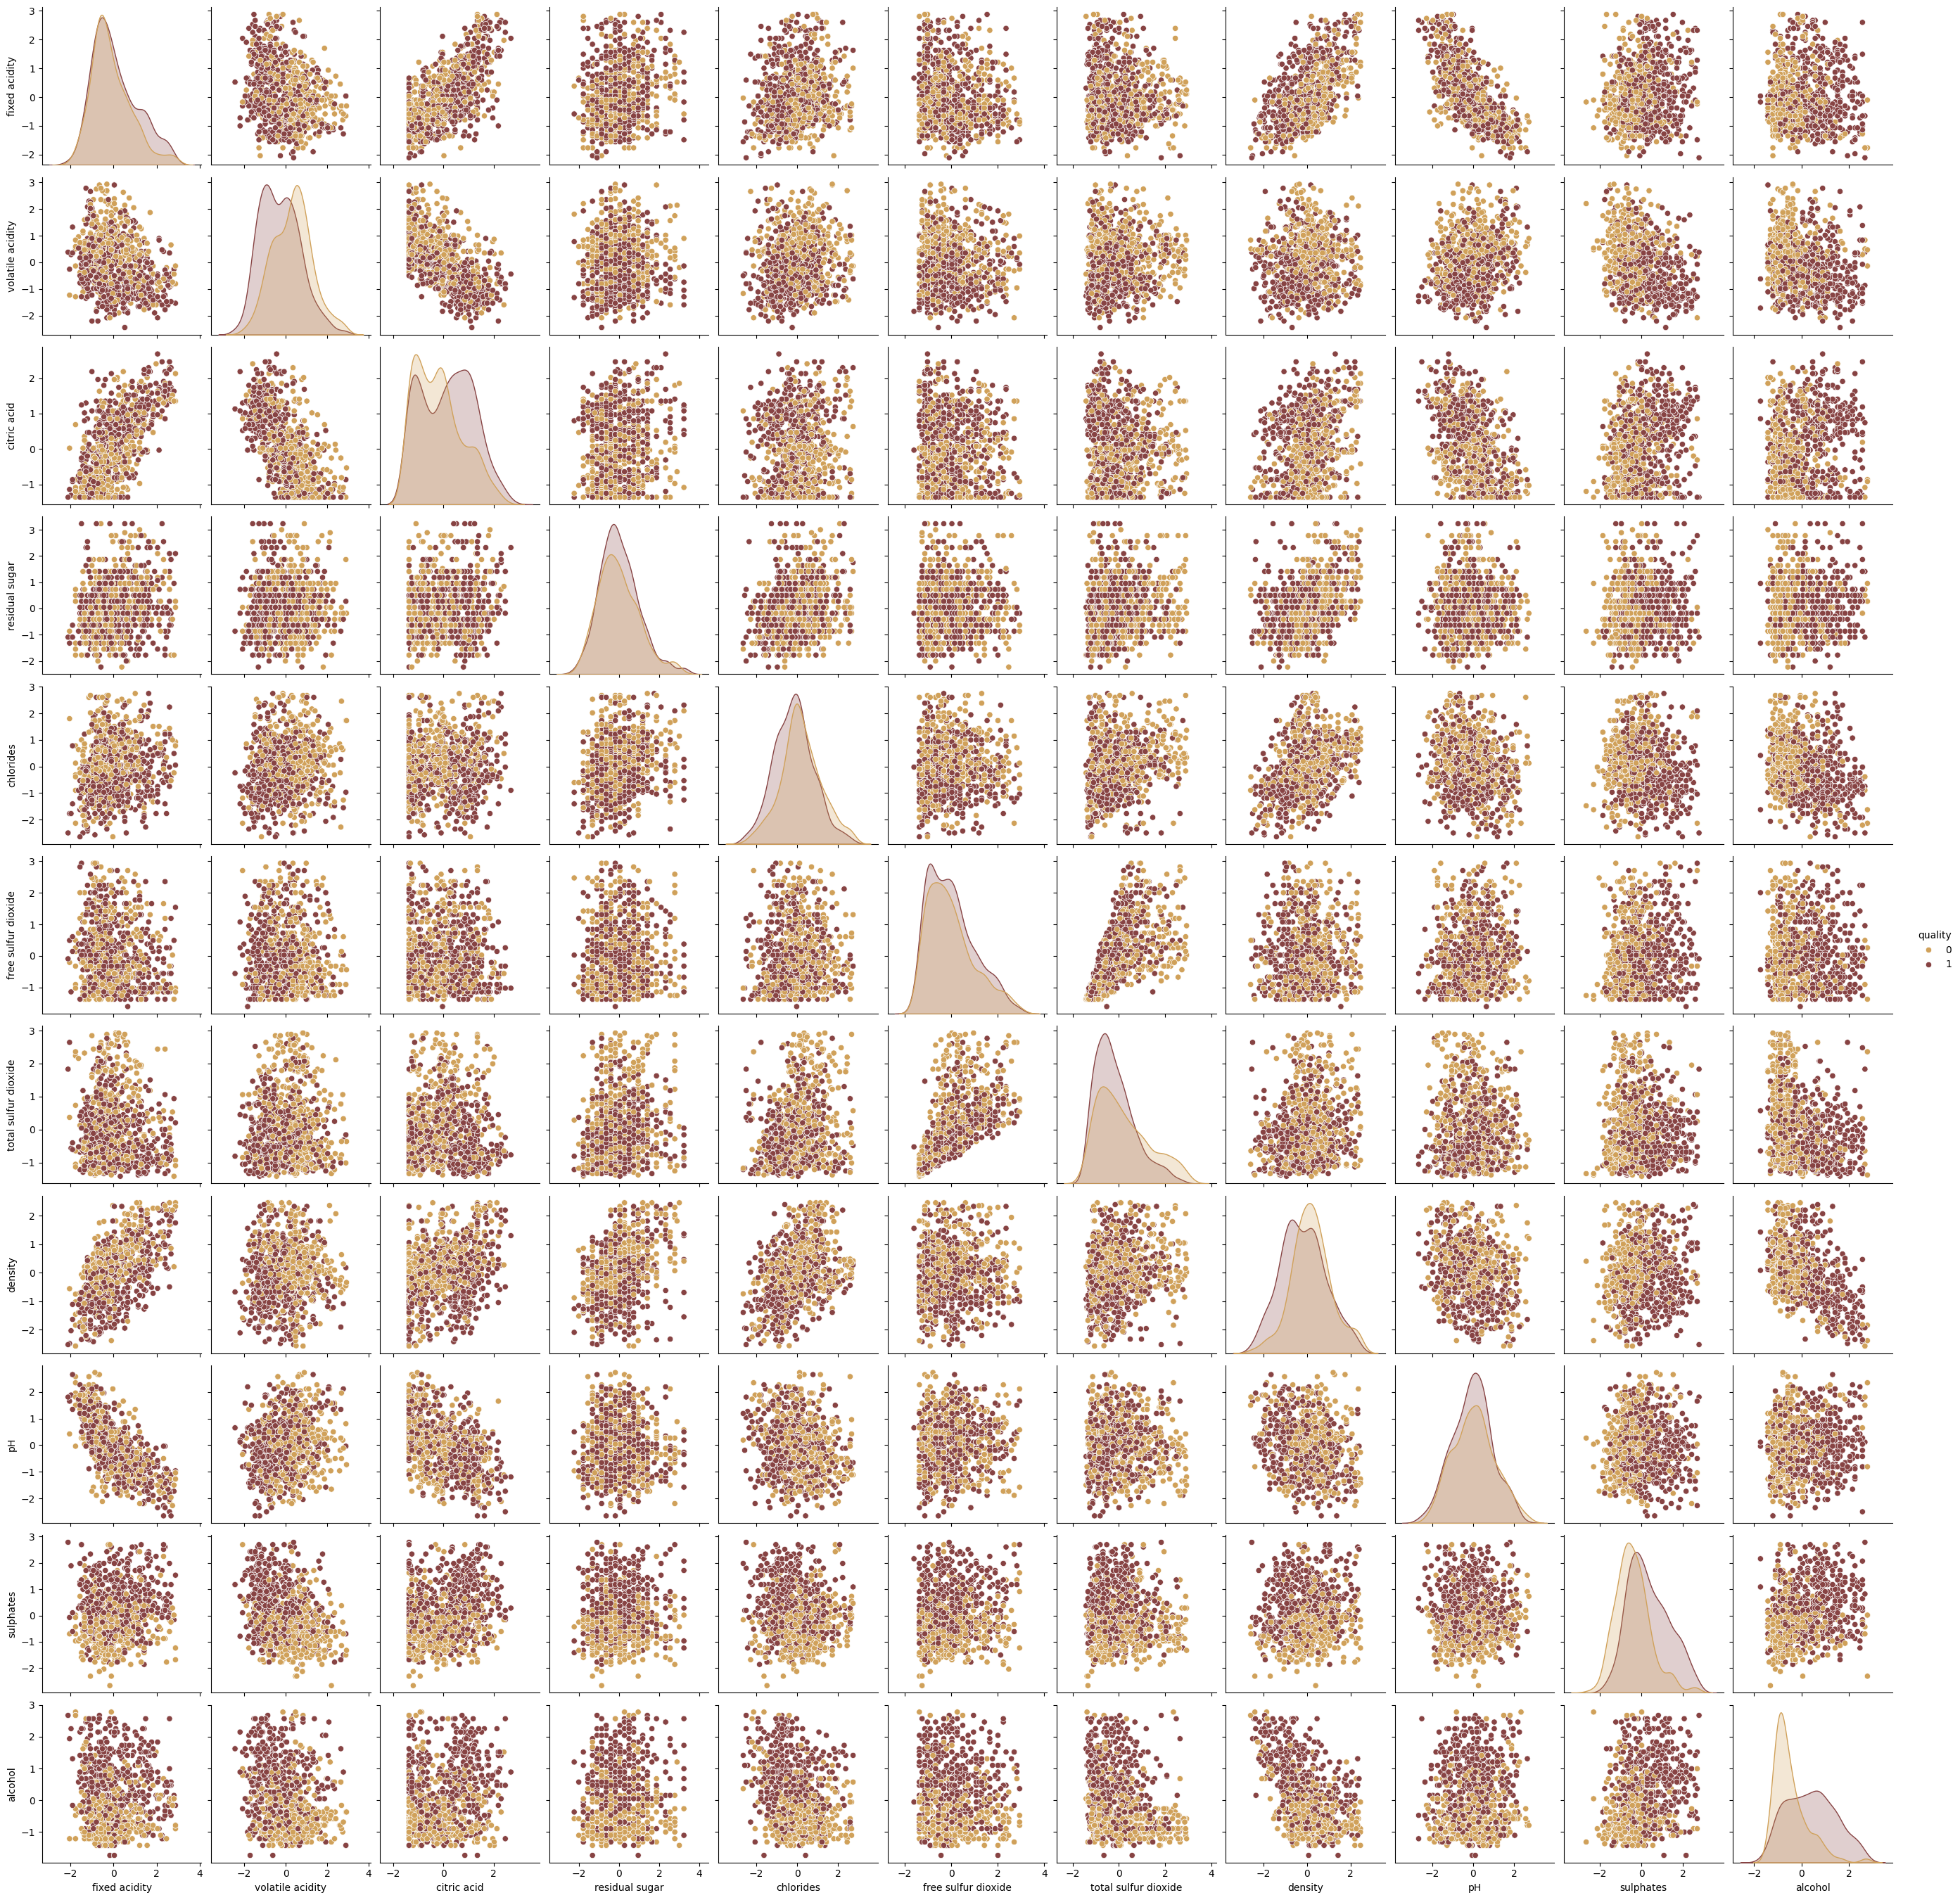

In [ ]:
colors = {1: "#874343", 0: "#D0A15A"}
sns.pairplot(data_d, hue="quality", palette=colors)

Sin embargo, en esa visualización no se aprecia el detalle. Por lo que se utilizó para dar una idea general y en la siguiente se puede explorar el detalle.

In [ ]:
dropdown_options = [col for col in data_d.columns if col != 'quality']
attribute1_dropdown = widgets.Dropdown(options=dropdown_options, description='Attribute 1')
attribute2_dropdown = widgets.Dropdown(options=dropdown_options, description='Attribute 2')

def update_plot(attribute1, attribute2):
  if attribute1 != attribute2:
    plt.figure(figsize=(6, 6))
    sns.pairplot(data_d[[attribute1, attribute2, 'quality']], hue='quality', palette=colors)
    plt.show()
  else:
      print("The attributes must be different.")

ui = widgets.VBox([attribute1_dropdown, attribute2_dropdown])
display(ui)
widgets.interactive_output(update_plot, {'attribute1': attribute1_dropdown, 'attribute2': attribute2_dropdown})

Output()

En esta visualización se observa la distribución de ambas calidades del vino para cada *feature*. La calidad del vino bueno es de color morado y la de mala calidad es amarillo. Al analizar los gráficos, se puede observar que no hay ninguna división clara entre los datos para ningún *feature*.

En la diagonal se encuentra la distribución de ambas clases. En la mayoría de *features* son muy similares. Excepto para el alcohol, en la que se puede observar que los vinos de mala calidad tiene más alcohol que los de buena calidad. También, se puede obsrvar una ligera diferencia para el *total sulfur dioxide*, donde los vinos de alta calidad tienen más que los de baja calidad.

Ahora, se van a separar los datos entre *train* y *test* utilizando el 80/20 para el entrenamiento de los modelos.

In [ ]:
data_x = data_d.loc[:, numeric_attributes]
data_y = data_d.loc[:, 'quality']
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(data_x, data_y, test_size = 0.2, random_state = 18)

In [ ]:
model_results = {"train":{}, "test":{}}

In [ ]:
roc_auc_data = {"svm":{}, "rf":{}, "knn":{}, "gpc":{}, "xgb":{}}

In [ ]:
def plot_model_metrics(model_str):
  labels = list(model_results["test"][model_str].keys())
  values_train = list(model_results["train"][model_str].values())
  values_test = list(model_results["test"][model_str].values())

  colors = ['#ED6B5A', '#91A776', '#9BC1BC', '#dbd9af', '#468186']

  fig, axs = plt.subplots(1, 2, figsize=(10, 4))
  bars_train = axs[0].bar(labels, values_train, color=colors)
  axs[0].set_ylim(0, 1)
  axs[0].set_title(model_str.upper() +' in Training')
  axs[0].set_xlabel('Metrics')
  axs[0].set_ylabel('Scores')
  axs[0].bar_label(bars_train, fmt='%.2f', label_type='edge', padding=-20)

  bars_testing = axs[1].bar(labels, values_test, color=colors)
  axs[1].set_ylim(0, 1)
  axs[1].set_title(model_str.upper() +' in Testing')
  axs[1].set_xlabel('Metrics')
  axs[1].bar_label(bars_testing, fmt='%.2f', label_type='edge', padding=-20)

  plt.tight_layout()
  plt.show()

A continuación, se escogieron 5 modelos para probar en la clasificación binaria de vino bueno y malo.

### Support Vector Machine (SVM)

El *support vector machine* (SVM) es un algoritmo que se utiliza en clasificación lineal o no lineal. Este algoritmo pretende encontrar la mayor separación de las clases mediante hiperplanos [9].

Para este experimento, se utilizará el SVM lineal. Este utiliza un límites de decisión lineal para separar las clases [9]. Este es un algoritmo poderoso que resulta muy conveniente para la clasificación de diversos problemas. Por ello, resulta interesante probarlo en este problema que no parece ser lineal para determinar su rendimiento.

El hiperparámetro de este modelo es la `C`. Esta indica la cantidad de regularización del modelo. Determina la compensación entre la habilidad del modelo de clasificar el subconjunto de *train* y la maximinzación del margen [10].

Un valor pequeño de `C` provoca que el modelo se enfoque en maximizar el margen. Esto es útil cuando hay datos ruidosos o sobrelapados. En cambio, un valor alto enfatiza en clasificar correctamente, lo cual puede provocar que el modelo se vuelva muy sensible a datos individuales [10].

A continuación, se exploran diferentes valores de `C` para identificar cuál es el que tiene un mejor *accuracy*.

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_results = []
test_results = []

for c in c_values:
  lin_clf = LinearSVC(penalty='l2', C=c, dual='auto', random_state=18)
  lin_clf.fit(x_train_1, y_train_1)
  train_results.append(lin_clf.score(x_train_1, y_train_1))
  test_results.append(lin_clf.score(x_test_1, y_test_1))

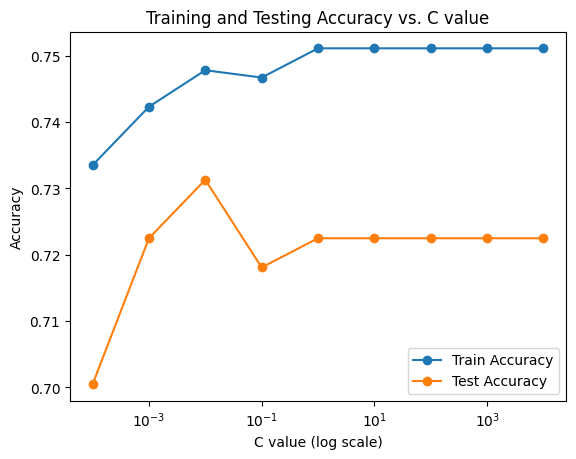

In [ ]:
plt.plot(c_values, train_results, label='Train Accuracy', marker='o')
plt.plot(c_values, test_results, label='Test Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. C value')
plt.legend()
plt.show()

Como se puede observar, si el valor de `C` es muy pequeño, hay más *underfitting*. En `0.01` hay un punto en el que el *train* y el *test accuracy* se acercan. A partir de `1`parece haber una asíntota horizontal en el *accuracy*. Sin embargo, es importante notar que el *accuracy*, en general, se encuentra en valores relativamente bajos. El *accuracy* mayor obtenido fue, aproximadamente, 75%.

El valor de `C` más prometedor es el `0.01`, ya que la diferencia entre *train* y *test* es la menor. En este punto, es el mayor *accuracy* obtenido para *test* y el segundo mayor para *train*.

In [ ]:
lin_clf = LinearSVC(penalty='l2', C=0.01, dual='auto', random_state=18)
lin_clf.fit(x_train_1, y_train_1)

LinearSVC(C=0.01, random_state=18)

In [ ]:
y_pred_train = lin_clf.predict(x_train_1)
y_pred_test = lin_clf.predict(x_test_1)

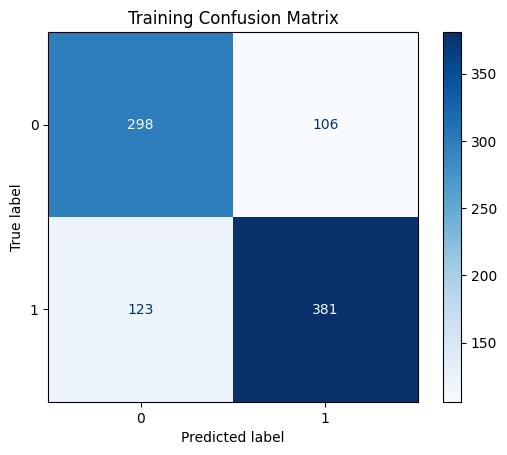

In [ ]:
matrix = metrics.confusion_matrix(y_train_1, y_pred_train)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Training Confusion Matrix')
plt.show()

De la matriz de confusión de *train* se puede observar que este modelo logró clasificar bastante bien los vinos de buena calidad. Sin embargo, con los vinos de mala calidad se confundió más.

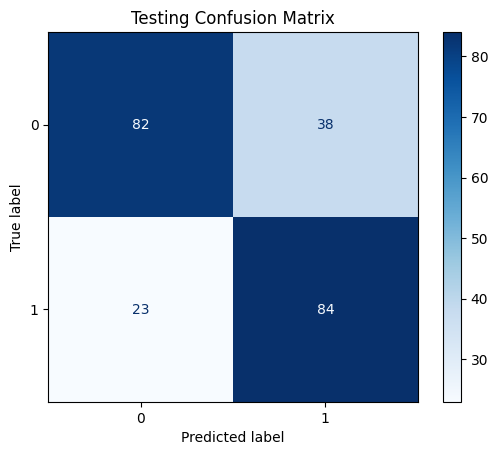

In [ ]:
matrix = metrics.confusion_matrix(y_test_1, y_pred_test)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.show()

De la matriz de confusión de *test* se puede observar que el modelo clasificó bastantes de los vinos buenos como buenos y malos como malos. Sin embargo, falló al clasificar vinos malos como buenos.

In [ ]:
decision_scores_test = lin_clf.decision_function(x_test_1)
roc_auc = metrics.roc_auc_score(y_test_1, decision_scores_test)

Ahora, se va a evaluar el modelo con diferentes métricas [11]:
1. *Accuracy*: es la proporción de predicciones correctas sobre todas las predicciones.
1. *Precision*: es la proporción de predicciones de una clase entre todos los predichos por el modelo de esa clase.
1. *Recall*: es la proporción de predicciones de una clase entre todas las de la clase.
1. *F1*: toma en cuenta *precision* y *recall* mediante la fórmula:
$2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$
1. *ROC-AUC*: ROC(*Receiver Operating Characterisctic*) es el *rate* de los verdaderamente positivos y los falsos positivos. AUC (*Area Under the Curve*) es el área bajo la curva del ROC. Una clasificador perfecto en el gráfico se ve completamente sobre el eje-x y el eje-y haciendo una L invertida. En cambio, un clasificador aleatorio se ve como un diagonal que sale desde el punto (0, 0).

In [ ]:
model_results["train"]["svm"] = {
    "accuracy": metrics.accuracy_score(y_train_1, y_pred_train),
    "precision": metrics.precision_score(y_train_1, y_pred_train),
    "recall": metrics.recall_score(y_train_1, y_pred_train),
    "f1": metrics.f1_score(y_train_1, y_pred_train),
    "roc_auc": metrics.roc_auc_score(y_train_1, lin_clf.decision_function(x_train_1))
}
model_results["train"]["svm"]

{'accuracy': 0.7477973568281938,
 'precision': 0.7823408624229979,
 'recall': 0.7559523809523809,
 'f1': 0.768920282542886,
 'roc_auc': 0.8241297344020116}

In [ ]:
model_results["test"]["svm"] = {
    "accuracy": metrics.accuracy_score(y_test_1, y_pred_test),
    "precision": metrics.precision_score(y_test_1, y_pred_test),
    "recall": metrics.recall_score(y_test_1, y_pred_test),
    "f1": metrics.f1_score(y_test_1, y_pred_test),
    "roc_auc": metrics.roc_auc_score(y_test_1, lin_clf.decision_function(x_test_1))
}
model_results["test"]["svm"]

{'accuracy': 0.7312775330396476,
 'precision': 0.6885245901639344,
 'recall': 0.7850467289719626,
 'f1': 0.7336244541484717,
 'roc_auc': 0.8017133956386292}

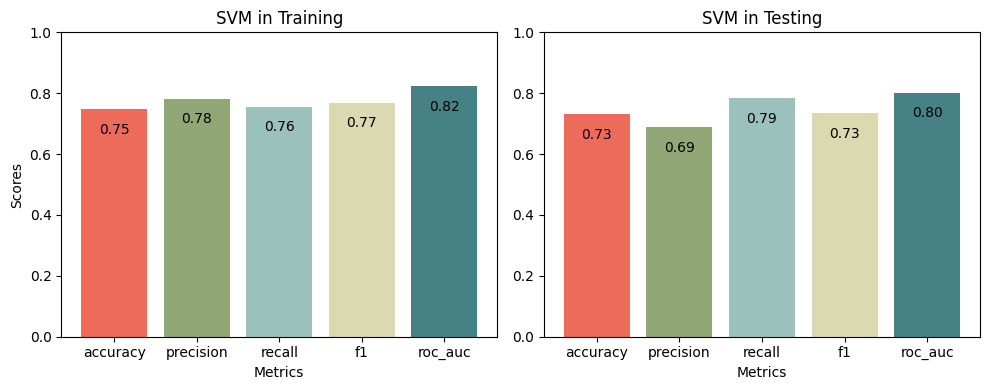

In [ ]:
plot_model_metrics("svm")

Los valores obtenidos de las métricas se pueden considerar buenos, pero no son los mejores. Todos los valores son mayores en *training*, lo cual es lógico ya que es con estos datos que se entrena el modelo. En la *precision* sí se puede notar una gran diferencia entre el *training* y el *testing*. Esto indica que el modelo tuvo un menor desempeño en las predicciones de la clase 1 que sí son correctas.

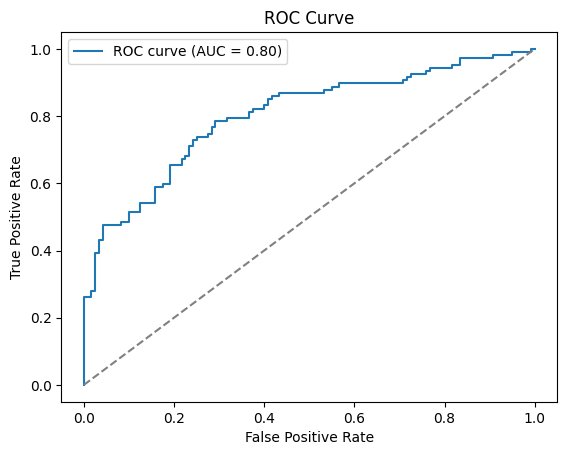

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, decision_scores_test)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

La curva de ROC-AUC obtenida se considera **buena**, la cual tuvo un valor de `0.80`. Se puede observar que tiene una forma escalonada. Asimismo, se muestra la curva que habría con `0.50` como referencia de un modelo con comportamiento aleatorio.

In [ ]:
roc_auc_data["svm"] = {
    "fpr": fpr,
    "tpr": tpr
}

### K-Nearest Neighbors (KNN)

*K-Nearest Neighbors* es un algoritmo popular y simple. Este algoritmo se basa en analizar los `k` vecinos para determinar si los datos que se deben clasificar como de un mismo grupo. Este algoritmo es no-paramétrico, lo cual se refiere a que no realiza ninguna suposición sobre los datos [12]. Para este experimento, este modelo fue escogido por su habilidad de encontrar grupos que no tienen una separación lineal.

Este algoritmo tiene varios hiperparámetros [12][13]:
1. `K`: indica la cantidad de vecinos que se deben considerar al clasificar un dato.
1. `Distance metrics`: se utiliza para identificar cuáles son los vecinos más cercanos. Las métricas más utilizadas son:
  1. `Euclidean`: es la diferencia cartesiana entre dos puntos que están en un hiperplano.
  1. `Manhattan`: se utiliza para saber la distancia total que se movió, en vez del desplazamiento. Se mide calculando la suma del valor absoluto de la diferencia entre las coordanas de los puntos en n-dimensiones.
  1. `Minkowski`: calcula la distancia tomando en consideración un valor p. Cuando su valor $p=1$, es *manhattan*, y cuando su valor $p=2$, es *euclidean*.
1. `Algorithm`: se utiliza para computar el vecinos más cercano. En scikit-learn, puede utilizar BallTree, KDTree o fuerza bruta.
1. `Weights`: se utiliza en la predicción. Puede ser `uniform`, donde cada vecinos tiene un mismo peso. También puede ser `distance` donde los pesos son el inverso de la distancia.

Primero, se quiso encontrar el mejor valor k para el problema.

In [ ]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 51, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train_1, y_train_1)
    train_score[neighbor]=knn.score(x_train_1, y_train_1)
    test_score[neighbor]=knn.score(x_test_1, y_test_1)

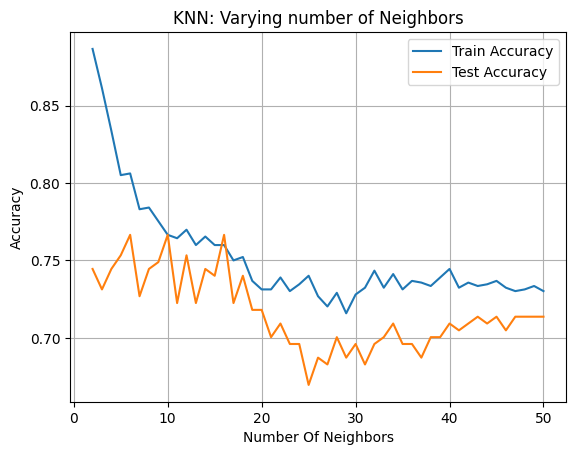

In [ ]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.grid()
plt.show()

Como se puede observar, se probaron los k desde 2 hasta 51. Al inicio había una gran diferencia entre el *training* y el *testing*. Sin embargo, en aproximadamente 15 se puede obvserar que se cruzan y el *testing* supera el *training*. Acercándose a 50 comienza a disminuir el *accuracy*, pero también la diferencia entre ellas.

No obstante, hay muchas otras combinaciones de hiperparámetros que se desean probar. Para ello, se utilizó el estimador GridSearchCV, el cual se encarga de buscar eshaustivamente todas las combinaciones de los hiperparámetros indicados. Para saber cuál es la mejor combinación, utiliza un sistema de *scoring*, donde se le pueden enviar diversas métricas a tomar en cuenta. El refit se refiere a volver a probar el estimador con los hiperparámetros mejores encontrados. Utiliza 5-fold de *cross validation* para encontrar esta combinación [14].

Para esta búsqueda, se quiso probar todas las métricas de distancia, todos los algoritmos y los pesos. Asimismo, con el rango entre 10 y 20, donde se determinaron resultados prometedores por el gráfico anterior.

In [ ]:
parameters = { 'n_neighbors' : list(range(10, 20)),
                'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              }
gs = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    verbose = 1,
    scoring=["accuracy", "roc_auc"],
    refit="roc_auc",
    n_jobs = -1
    )
g_res = gs.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
print("Best parameters:", g_res.best_params_)
print("Best score:", g_res.best_score_)

Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best score: 0.8631254125412541


Con esto, se determinó que para este problema el mejor algoritmo es `ball_tree`, la métrica manhattan, los vecinos 19 y los pesos por distancia. Estos valores tienen sentido teórico, ya que la métrica más apropiada para el problema es manhattan y los pesos uniformes no iban a ser muy útiles por lo sobrelapado de los datos.

El best_score es el promedio de los *scores* del mejor estimador *cross-validated* [14].

In [ ]:
knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=19, weights='distance')
knn.fit(x_train_1, y_train_1)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=19,
                     weights='distance')

In [ ]:
y_pred_train = knn.predict(x_train_1)
y_pred_test = knn.predict(x_test_1)

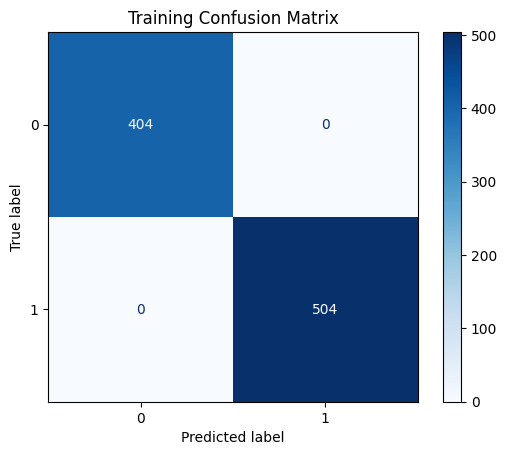

In [ ]:
matrix = metrics.confusion_matrix(y_train_1, y_pred_train)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Training Confusion Matrix')
plt.show()

Como se puede observar, en *training* el modelo tuvo un comportamiento perfecto. No se confundió ni una sola vez.

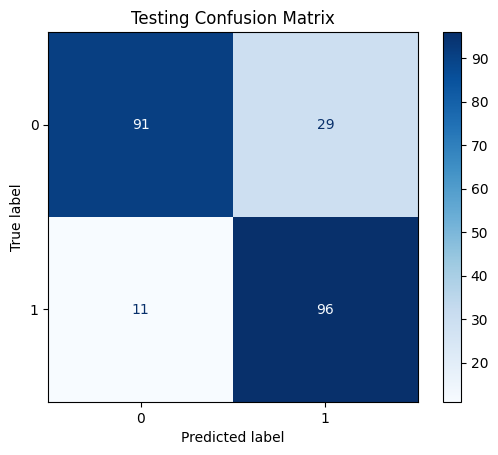

In [ ]:
matrix = metrics.confusion_matrix(y_test_1, y_pred_test)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.show()

En *testing* sí se confundió, pero se puede apreciar que la gran mayoría de los valores fueron predichos correctamente. Al igual que con el SVM, hubo varios vinos que fueron clasificados como de calidad buena cuando en realidad son de mala.

In [ ]:
y_pred_prob = knn.predict_proba(x_test_1)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, y_pred_prob, pos_label=1)

In [ ]:
model_results["train"]["knn"] = {
    "accuracy": metrics.accuracy_score(y_train_1, y_pred_train),
    "precision": metrics.precision_score(y_train_1, y_pred_train),
    "recall": metrics.recall_score(y_train_1, y_pred_train),
    "f1": metrics.f1_score(y_train_1, y_pred_train),
    "roc_auc": metrics.roc_auc_score(y_train_1, knn.predict_proba(x_train_1)[:, 1])
}
model_results["train"]["knn"]

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': 1.0}

In [ ]:
model_results["test"]["knn"] = {
    "accuracy": metrics.accuracy_score(y_test_1, y_pred_test),
    "precision": metrics.precision_score(y_test_1, y_pred_test),
    "recall": metrics.recall_score(y_test_1, y_pred_test),
    "f1": metrics.f1_score(y_test_1, y_pred_test),
    "roc_auc": metrics.roc_auc_score(y_test_1, knn.predict_proba(x_test_1)[:, 1])
}
model_results["test"]["knn"]

{'accuracy': 0.8237885462555066,
 'precision': 0.768,
 'recall': 0.897196261682243,
 'f1': 0.8275862068965517,
 'roc_auc': 0.9121495327102804}

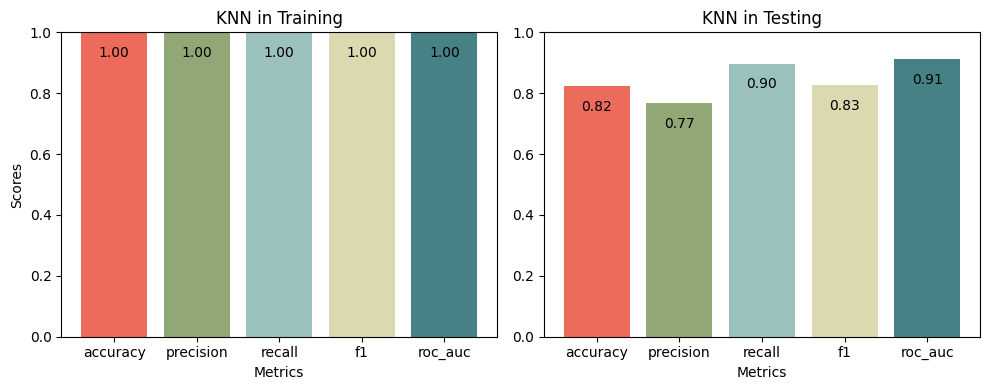

In [ ]:
plot_model_metrics("knn")

En este caso, tuvo un comportamiento perfecto en *training*. Constrastemente, en *testing* no tuvo un comportamiento perfecto. Se puede observar que el *accuracy* tiene un valor bueno. El menor es la precisión, debido a que atribuye vinos malos como buenos. Aún así, se puede apreciar que estos valores son mejores que lo que se ha visto anteriormente, debido a que el KNN no utiliza separaciones lineales.

Sin embargo, el comportamiento que se observa es de *overfitting*, ya que tiene un comportamiento perfecto en *training* pero uno bueno en *testing*. Esto significa que el modelo se aprendió el conjunto de datos de prueba. Según [12] este es problema conocido de KNN, ya que el algoritmo es afectado por *noise* en el conjunto de datos de prueba. Es decir, toma en cuenta datos para clasificar, que en realidad no son relevantes.

Como observación para trabajos futuros, para resolver este problema, se podrían descartar *features* que no parezcan relevantes o utilizar técnicas de reducción de dimensionalidad.

In [ ]:
roc_auc = metrics.roc_auc_score(y_test_1, y_pred_prob)

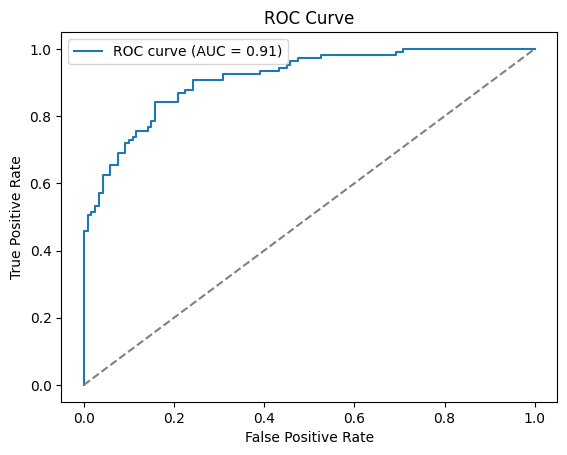

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
roc_auc_data["knn"] = {
    "fpr": fpr,
    "tpr": tpr
}

Por último, se puede observar que la curva de ROC-AUC tiene un valor alto (`0.91`). Como se observa, está más cerca de los ejes, lo cual indica que está más cerca de ser un modelo perfecto.

### Random Forest

Random Forest es un algoritmo muy poderosos que crea un número de *decision trees*. Cada uno de los árboles se construye usando un subconjunto de los datos de entrenamiento, lo cual permie que se introduzca aleatoridad y sea menos propenso a *overfitting*. Para predecir, cada árbol realiza un "voto" que es promediado [15]. Este algoritmo lo escogimos para estudiar si un modelo más poderoso es capaz de clasificar el problema correctamente.

Este algoritmo tiene muchos hiperparámetros. Sin embargo, para este experimento se concentró en algunos [16]:
1. `n_estimators`: indica la cantidad de árboles en el bosque.
1. `max_depth`: indica la máxima profundidad de un árbol.
1. `min_samples_split`: indica el número mínimo de muestras requeridas para sparar un nodo interno.
1. `min_samples_leaf`: indica el número mínimo de muestras requeridas para ser una hoja.
1. `max_features`: indica el números de *features* a considerar cuando se busca la mejor separación.
1. `max_leaf_nodes`: indica el número máximo de hojas que un árbol puede tener.

Al igual que con el KNN, se utiliza el GridSearch para encontrar la mejor combinación de los hiperparámetros. Para cada hiperparámetro se le asignaron una variedad de posibles valores para lograr encontrar qué es lo mejor para este problema.

In [ ]:
rf = RandomForestClassifier(random_state=18)
parameters = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [None, 5, 10, 25, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 5, 10, 50],
    'max_leaf_nodes': [5, 50, 100, None],
    'min_samples_split': [2, 4]
}
clf = GridSearchCV(
    estimator = rf,
    param_grid = parameters,
    verbose = 1,
    scoring=["accuracy", "roc_auc"],
    refit="roc_auc",
    n_jobs = -1
)
clf.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=18), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 25, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [5, 50, 100, None],
                         'min_samples_leaf': [1, 5, 10, 50],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 25, 50, 100]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

In [ ]:
print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}
Best score: 0.8472526585991933


De ello, se obtuvo la mejor combinación:

In [ ]:
rf = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=18
)
rf.fit(x_train_1, y_train_1)

y_pred_train = rf.predict(x_train_1)
print("Train accuracy: ", metrics.accuracy_score(y_train_1, y_pred_train))
y_pred_test = rf.predict(x_test_1)
print("Test accuracy: ", metrics.accuracy_score(y_test_1, y_pred_test))

Train accuracy:  1.0
Test accuracy:  0.8105726872246696


A pesar de que esta fue la combinación que se detectó como la mejor, se puede detectar un comportamiento de *overfitting*. Entonces, se probaron diferentes combinaciones a mano para intentar generalizar más.

In [ ]:
rf = RandomForestClassifier(
    max_depth=10,
    max_features=2,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=18
)
rf.fit(x_train_1, y_train_1)

y_pred_train = rf.predict(x_train_1)
print("Train accuracy: ", metrics.accuracy_score(y_train_1, y_pred_train))
y_pred_test = rf.predict(x_test_1)
print("Test accuracy: ", metrics.accuracy_score(y_test_1, y_pred_test))

Train accuracy:  0.9922907488986784
Test accuracy:  0.8370044052863436


Después de diversas pruebas, el modelo resultante tuvo un *test accuracy* de `0.84`. Basados en la teoría en la experimentación se obtuvo esto [15][16]. A este modelo se le puso un `max_depth` bajo para que los patrones de los árboles fueran más generales. También, se le limitó más la cantidad de *features* a tomar en cuenta al separar nodos. Asimismo, se limitaron los `min_samples_leaf` y `min_samples_split` para que los árboles sean menos complejos.

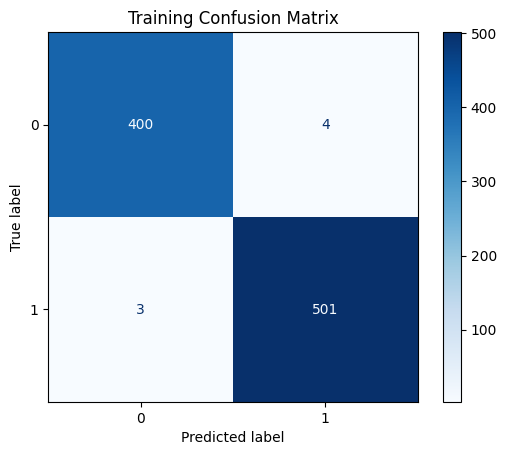

In [ ]:
matrix = metrics.confusion_matrix(y_train_1, y_pred_train)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Training Confusion Matrix')
plt.show()

Se puede observar una matriz de confusión casi perfecta para *training*.

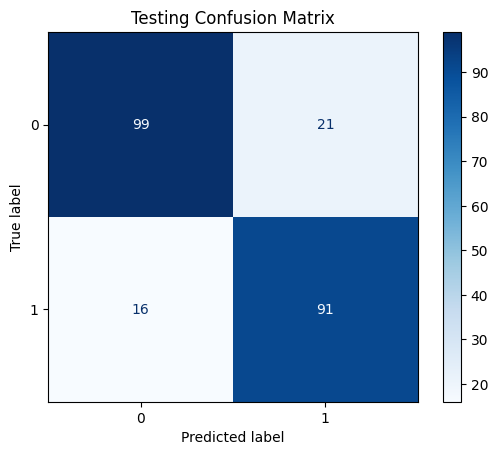

In [ ]:
matrix = metrics.confusion_matrix(y_test_1, y_pred_test)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.show()

Esta es una matriz de confusión buena. Los valores de las predicciones incorrectas son mucho menores que las correctas.

In [ ]:
decision_scores = rf.predict_proba(x_test_1)[:, 1]
roc_auc = metrics.roc_auc_score(y_test_1, decision_scores)

In [ ]:
model_results["train"]["rf"] = {
    "accuracy": metrics.accuracy_score(y_train_1, y_pred_train),
    "precision": metrics.precision_score(y_train_1, y_pred_train),
    "recall": metrics.recall_score(y_train_1, y_pred_train),
    "f1": metrics.f1_score(y_train_1, y_pred_train),
    "roc_auc": metrics.roc_auc_score(y_train_1, rf.predict_proba(x_train_1)[:, 1])
}
model_results["train"]["rf"]

{'accuracy': 0.9922907488986784,
 'precision': 0.9920792079207921,
 'recall': 0.9940476190476191,
 'f1': 0.9930624380574826,
 'roc_auc': 0.9997937293729373}

In [ ]:
model_results["test"]["rf"] = {
    "accuracy": metrics.accuracy_score(y_test_1, y_pred_test),
    "precision": metrics.precision_score(y_test_1, y_pred_test),
    "recall": metrics.recall_score(y_test_1, y_pred_test),
    "f1": metrics.f1_score(y_test_1, y_pred_test),
    "roc_auc": metrics.roc_auc_score(y_test_1, rf.predict_proba(x_test_1)[:, 1])
}
model_results["test"]["rf"]

{'accuracy': 0.8370044052863436,
 'precision': 0.8125,
 'recall': 0.8504672897196262,
 'f1': 0.8310502283105022,
 'roc_auc': 0.8998442367601246}

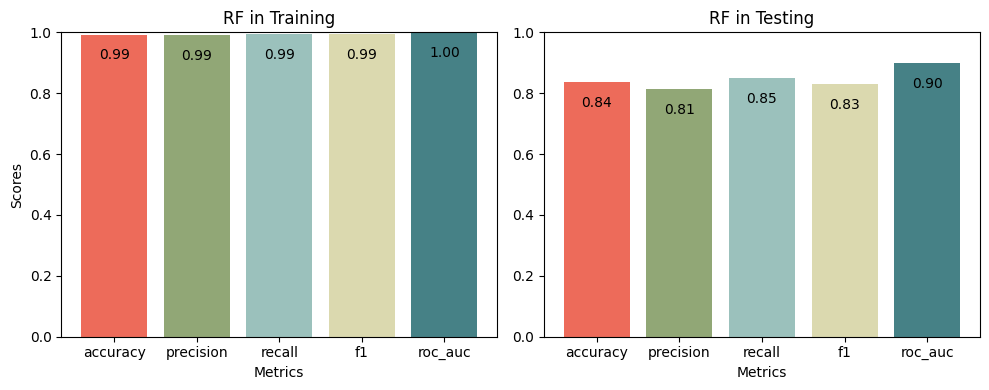

In [ ]:
plot_model_metrics("rf")

Como se puede observar, los resultados de *training* son casi perfectos. Los resultados de *testing*, en cambio, solo son buenos. Todavía se ve un *overfitting*. Los valores de *accuracy*, *precision*, *recall* y *f1* son muy similares en *testing*. Así como a los otros modelos, el *precision* es el menor, debido a que se clasifican vinos malos como buenos.

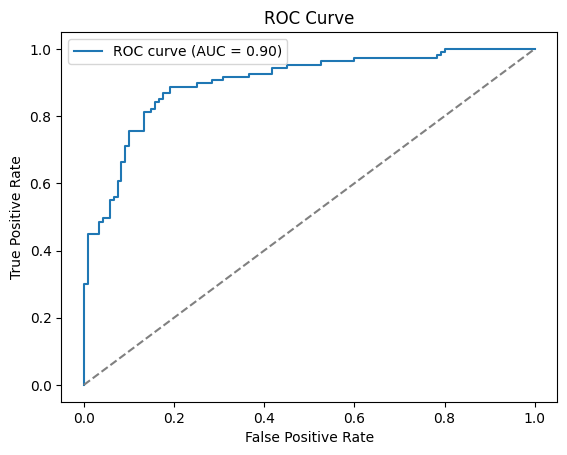

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, decision_scores)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

De esta curva se puede observar que tiene un comportamiento muy bueno. No es tan escalonada como las que se han observado de los modelos anteriores. También se puede notar que tiene una forma de L invertida más definida.

In [ ]:
roc_auc_data["rf"] = {
    "fpr": fpr,
    "tpr": tpr
}

### Gaussian Processes

El Gaussian Process es un algoritmo de aprendizaje automático utilizado para tareas de aprendizaje supervisado, como regresión y clasificación. La intuición detrás de este algoritmo es utilizar un modelo probabilístico que encuentra una distribución entre muchas funciones, conocida como un proceso Gaussiano. El algoritmo entonces utiliza esta distribución para predecir la salida de una función dada una colección de entradas de datos [17].

De acuerdo a [17], este modelo es beneficiado al utilizar `StandardScaler`, por lo que el estado actual de los datos se considera beneficioso.

El algoritmo presenta varios hiperparámetros, pero para probarlo se utilizarlon los siguientes [18]:


1. `kernel`: De manera similar al SVM, este acepta un kernel, en este caso especifica la función de covarianza.
2. `optimizer`: Se encarga de optimizar los parámetros del kernel, se le puede mandar una implementación propia de un optimizer, alguno proveído por la biblioteca o ninguno.
3. `max_iter_predict`: El máximo número de iteraciones en el método de Newton para aproximar, entre menor sean los valores peor serán los resultados, pero menor el costo computacional.


Primero, se intentó el modelo con sus parámetros establecidos por *default* para ver cómo se comportaba con el conjunto de datos.

In [ ]:
gpc = GaussianProcessClassifier(random_state=18)
gpc.fit(x_train_1, y_train_1)

GaussianProcessClassifier(random_state=18)

In [ ]:
y_pred_train = gpc.predict(x_train_1)
print("Train accuracy: ", metrics.accuracy_score(y_train_1, y_pred_train))
y_pred_test = gpc.predict(x_test_1)
print("Test accuracy: ", metrics.accuracy_score(y_test_1, y_pred_test))

Train accuracy:  0.9427312775330396
Test accuracy:  0.8237885462555066


Podemos notar que con sus parámetros base se tiene un buen comportamiento tanto para *training* y *testing*. Ambos valores se encuentran cerca y el modelo parece un poco *overfit* al conjunto de datos por la diferencia entre los valores.

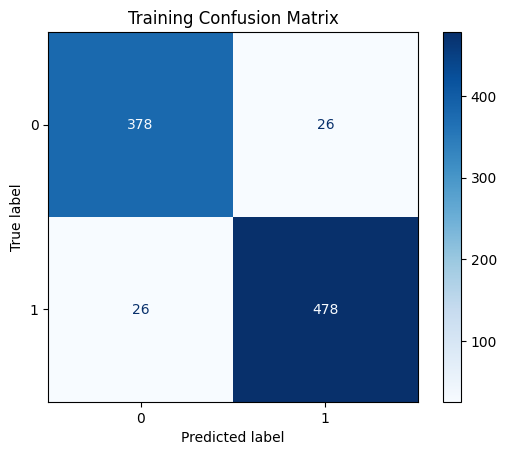

In [ ]:
y_pred = gpc.predict(x_train_1)
matrix = metrics.confusion_matrix(y_train_1, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Training Confusion Matrix')
plt.show()

Aquí podemos observar el porqué el modelo presenta un accuracy de training alto y favorable, parece tener un buen comportamiento acertando las clases. Aunque igualmente presenta algunos falsos positivos y negativos, no está apegado al conjunto de datos de training en su enteridad.

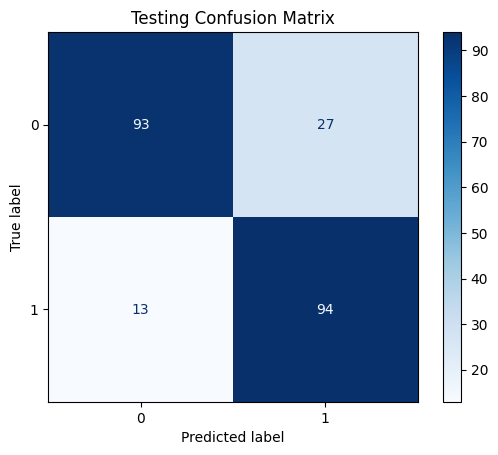

In [ ]:
y_pred = gpc.predict(x_test_1)
matrix = metrics.confusion_matrix(y_test_1, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.show()

En el caso del testing, el comportamiento observado se mantiene, donde en general es mayoritariamente bueno acertando las clases en sus valores verdaderos. Debido a que solo se están utilizando los parámetros que son *default*, se van a intentar diversas combinaciones con el propósito de generalizar más.

In [ ]:
gpc = GaussianProcessClassifier(random_state=18)

parameters = {
    'kernel' : [
        1.0 * kernels.Matern(length_scale=1.0, nu=1.5),
        1.0 * kernels.RBF(1.0)
    ],
    'optimizer' : ['fmin_l_bfgs_b', None],
    'max_iter_predict' : [10, 50, 100, 150]
}

clf = GridSearchCV(
    estimator = gpc,
    param_grid = parameters,
    verbose = 1,
    scoring=["accuracy", "roc_auc"],
    refit="roc_auc",
    n_jobs = -1
)
clf.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=GaussianProcessClassifier(random_state=18), n_jobs=-1,
             param_grid={'kernel': [1**2 * Matern(length_scale=1, nu=1.5),
                                    1**2 * RBF(length_scale=1)],
                         'max_iter_predict': [10, 50, 100, 150],
                         'optimizer': ['fmin_l_bfgs_b', None]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

In [ ]:
print(clf.best_params_)

{'kernel': 1**2 * Matern(length_scale=1, nu=1.5), 'max_iter_predict': 10, 'optimizer': None}


In [ ]:
gpc = GaussianProcessClassifier(
    random_state=18,
    kernel=1.0 * kernels.Matern(length_scale=1.0, nu=1.5),
    max_iter_predict=10,
    optimizer=None
)
gpc.fit(x_train_1, y_train_1)

GaussianProcessClassifier(kernel=1**2 * Matern(length_scale=1, nu=1.5),
                          max_iter_predict=10, optimizer=None, random_state=18)

In [ ]:
print(gpc.score(x_train_1, y_train_1))
print(gpc.score(x_test_1, y_test_1))

0.9328193832599119
0.8061674008810573


Al realizar la búsqueda por medio de los diversos parámetros, se encontró la mejor combinación, pero curiosamente esta no es mejor que el caso base observado previamente. Presentan un comportamiento similar, pero la diferencia entre el *accuracy* de las pruebas y entrenamiento ha aumentado un poco. Por esta razón, se ha decidio mantener los parámetros en su estado base.

In [ ]:
gpc = GaussianProcessClassifier(random_state=18)
gpc.fit(x_train_1, y_train_1)

GaussianProcessClassifier(random_state=18)

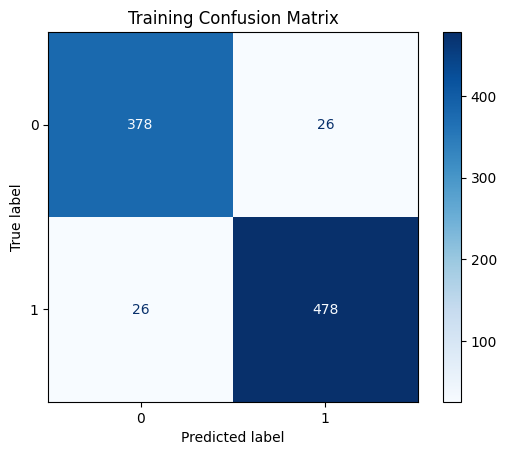

In [ ]:
y_pred_train = gpc.predict(x_train_1)
matrix = metrics.confusion_matrix(y_train_1, y_pred_train)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Training Confusion Matrix')
plt.show()

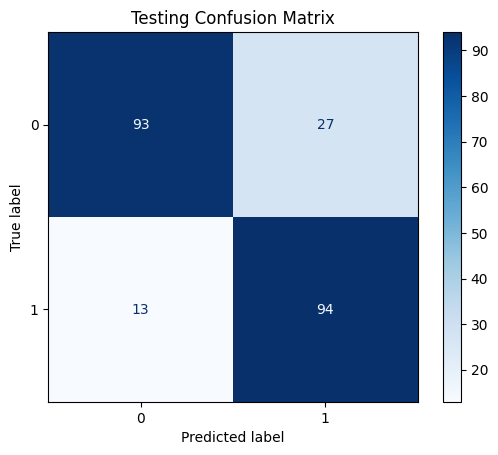

In [ ]:
y_pred_test = gpc.predict(x_test_1)
matrix = metrics.confusion_matrix(y_test_1, y_pred_test)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.show()

Podemos entonces nuevamente observar las matrices de confusión obtenidas previamente.

In [ ]:
y_pred_prob = gpc.predict_proba(x_test_1)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, y_pred_prob, pos_label=1)

In [ ]:
model_results["train"]["gpc"] = {
    "accuracy": metrics.accuracy_score(y_train_1, y_pred_train),
    "precision": metrics.precision_score(y_train_1, y_pred_train),
    "recall": metrics.recall_score(y_train_1, y_pred_train),
    "f1": metrics.f1_score(y_train_1, y_pred_train),
    "roc_auc": metrics.roc_auc_score(y_train_1, gpc.predict_proba(x_train_1)[:, 1])
}
model_results["train"]["gpc"]

{'accuracy': 0.9427312775330396,
 'precision': 0.9484126984126984,
 'recall': 0.9484126984126984,
 'f1': 0.9484126984126984,
 'roc_auc': 0.9822116140185447}

In [ ]:
model_results["test"]["gpc"] = {
    "accuracy": metrics.accuracy_score(y_test_1, y_pred_test),
    "precision": metrics.precision_score(y_test_1, y_pred_test),
    "recall": metrics.recall_score(y_test_1, y_pred_test),
    "f1": metrics.f1_score(y_test_1, y_pred_test),
    "roc_auc": metrics.roc_auc_score(y_test_1, gpc.predict_proba(x_test_1)[:, 1])
}
model_results["test"]["gpc"]

{'accuracy': 0.8237885462555066,
 'precision': 0.7768595041322314,
 'recall': 0.8785046728971962,
 'f1': 0.8245614035087719,
 'roc_auc': 0.8797507788161993}

In [ ]:
roc_auc = metrics.roc_auc_score(y_test_1, y_pred_prob)

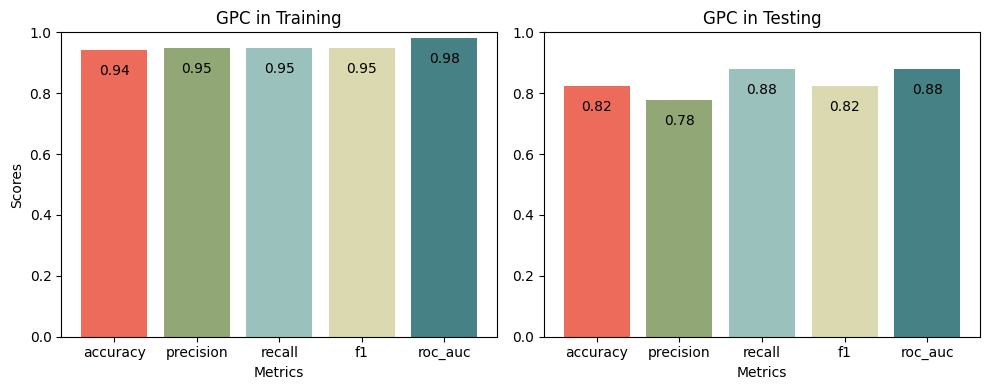

In [ ]:
plot_model_metrics("gpc")

Podemos entonces observar que el GPC en el entrenamiento tiene un comportamiento bastante balanceado entre las métricas, obteniendo un valor bajo la curva ROC casi perfecto.

En el caso opuesto, a la hora de probar el modelo con datos nuevos, no se presenta el mismo balance en todas las métricas.

La menor métrica aquí es la precisión, parece entonces que el modelo está asignando varios falsos positivos, en específico un 22% de los datos. Aunque este no es un comportamiento deseable, hay que tomar en cuenta que estos podrían ser datos de clases que estaban originalmente cercanos antes de hacer la partición binaria.

El mayor valor está empatado entre el *recall* y el área bajo la curva ROC. En este caso entonces podemos ver que el modelo se adapta bien para capturar la mayoría de instancias positivas (vino de alta calidad), pero igual falla algunas.

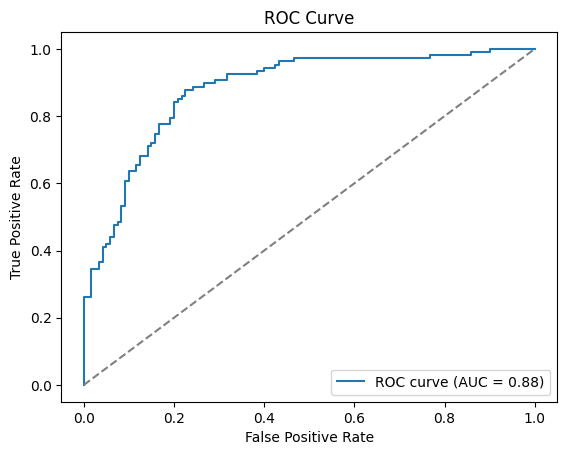

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Podemos entonces interpretar la curva y el área bajo esta. El modelo se aleja de la aleatoridad y se acerca a lo que conocemos como un comportamiento perfecto, esto es apoyado por su área bajo la curva de 0.88 igualmente.

In [ ]:
roc_auc_data["gpc"] = {
    "fpr": fpr,
    "tpr": tpr
}

### XGBoost

XGBoost significa *Extreme Gradient boosting*. Es un algoritmo *ensemble* que mezcla predicciones de diversos modelos más débiles para hacer predicciones más fuertes. Este algoritmo es una optimización de Gradient Boosting, en el que cada predictor corrige el error del predictor anterior. XGBoost varios *decision trees* son creados y utiliza pesos para predecir. Luego, todos los clasificadores son ensamblados [19]. Este algoritmo fue escogido debido a que es muy poderoso, esperando encontrar resultados novedosos.

Este algoritmo tiene la desventaja de tener muchos hiperparámetros, por lo que solo se analizaron algunos para este experimento [20][21]:
1. `objetive`: indica el *learning task*. Las opciones que resultan interesantes para este problema de clasificación binaria son: `binary:logistic`, `binary:logitraw` y `binary:hinge`.
1. `max_depth`
1. `n_estimators`
1. `learning_rate` o `eta`: después de cada paso de mejora, eta reduce los pesos de las funciones para hacer que la mejora sea más conservadora.
1. `subsample`: la fracción de observaciones que pueden ser *samples* aleatorios de un árbol.
1. `colsample_bytree`: es la proporción de *subsample* de las columnas cuando se contruye cada árbol.
1. `min_child_weight`: el la mínima suma de pesos de todas las observaciones requeridas en un hijo. Un valor alto ayuda a controlar el *overfitting*.
1. `gamma`: define la *minimum loss reduction* requierida para hacer una separación.


Al igual que con los otros modelos, se utiliza el GridSearch para encontrar la mejor combinación de los hiperparámetros. Para cada hiperparámetro se le asignaron una variedad de posibles valores para lograr encontrar qué es lo mejor para este problema.

In [ ]:
parameters = {
    'objective':['binary:logistic', 'binary:logitraw', 'binary:hinge'],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [3, 5],
    'gamma': [0.1, 0.5],
}

clf = GridSearchCV(
    estimator = XGBClassifier(random_state=18, n_jobs=-1),
    param_grid = parameters,
    verbose = 1,
    scoring=["accuracy", "roc_auc"],
    refit="roc_auc",
    n_jobs = -1
)
clf.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=18, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0.1, 0.5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [3, 5],
                         'n_estimators': [100, 200],
                         'objective': ['binary:logistic', 'binary:logitraw',
                                       'binary:hinge'],
                         'subsample': [0.6, 0.8, 1.0]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

De esta búsqueda se obtuvieron los siguientes hiperparámetros:

In [ ]:
print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 1.0}
Best score: 0.8485834861263903


In [ ]:
xgb = XGBClassifier(objective='binary:logistic', colsample_bytree=0.8, gamma=0.1,
                    learning_rate=0.05, max_depth=7, min_child_weight=3,
                    n_estimators=200, subsample=1.0, random_state=18)
xgb.fit(x_train_1, y_train_1)

y_pred_train = xgb.predict(x_train_1)
print(metrics.accuracy_score(y_pred_train, y_train_1))
y_pred_test = xgb.predict(x_test_1)
print(metrics.accuracy_score(y_pred_test, y_test_1))

0.986784140969163
0.8149779735682819


Como se puede observar, se tiene un comportamiento bueno, pero igualmente se observar *overfitting*. [19] explica que este algoritmo tiene el problema de *overfitting* cuando se tienen pequeños conjuntos de datos. El conjunto de datos utilizado no es pequeño, pero tampoco es grande, por lo que esto puede estar afectando.

A pesar de ello, se intentó modificar manualmente los hiperparámetros para encontrar una combinación más apropiada.

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=18, gamma=0.1,
                    learning_rate=0.05, max_depth=5, min_child_weight=4,
                    n_estimators=250, subsample=1.0, colsample_bytree=0.8)
xgb.fit(x_train_1, y_train_1)

y_pred_train = xgb.predict(x_train_1)
print(metrics.accuracy_score(y_pred_train, y_train_1))
y_pred_test = xgb.predict(x_test_1)
print(metrics.accuracy_score(y_pred_test, y_test_1))

0.9581497797356828
0.8325991189427313


Con las modificaciones, se  logró mejorar el *accuracy* de *testing* y reducir el *overfitting*.

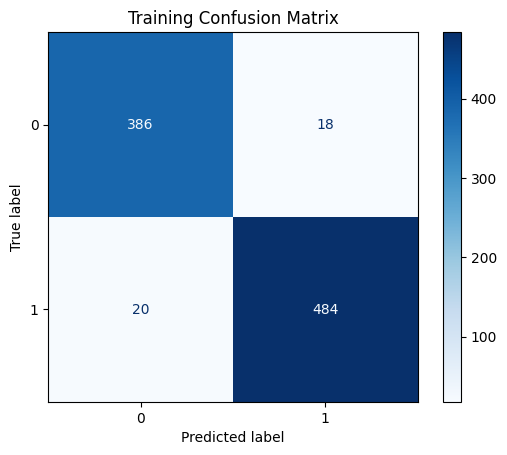

In [ ]:
matrix = metrics.confusion_matrix(y_train_1, y_pred_train)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Training Confusion Matrix')
plt.show()

Se puede observar que la matriz de confusión está bastante bien, pero no es perfecta. Como parte del proceso de evitar el *overfitting*, se redujo el *accuracy* de *training*.

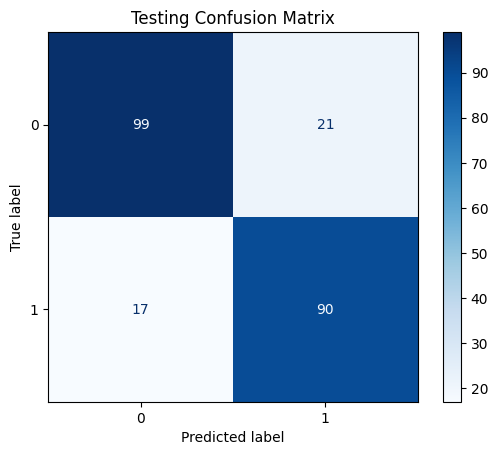

In [ ]:
matrix = metrics.confusion_matrix(y_test_1, y_pred_test)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.show()

La matriz de confusión de *testing* evidencia que casi todas los datos fueron predichos correctamente. Cabe destacar que esta matriz de confusión resalta de las otras de *testing* porque no tiene una tendencia a confundir los vinos malos como buenos.

In [ ]:
y_pred_prob = xgb.predict_proba(x_test_1)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, y_pred_prob, pos_label=1)

In [ ]:
model_results["train"]["xgb"] = {
    "accuracy": metrics.accuracy_score(y_train_1, y_pred_train),
    "precision": metrics.precision_score(y_train_1, y_pred_train),
    "recall": metrics.recall_score(y_train_1, y_pred_train),
    "f1": metrics.f1_score(y_train_1, y_pred_train),
    "roc_auc": metrics.roc_auc_score(y_train_1, xgb.predict_proba(x_train_1)[:, 1])
}
model_results["train"]["xgb"]

{'accuracy': 0.9581497797356828,
 'precision': 0.9641434262948207,
 'recall': 0.9603174603174603,
 'f1': 0.9622266401590457,
 'roc_auc': 0.9923286971554298}

In [ ]:
model_results["test"]["xgb"] = {
    "accuracy": metrics.accuracy_score(y_test_1, y_pred_test),
    "precision": metrics.precision_score(y_test_1, y_pred_test),
    "recall": metrics.recall_score(y_test_1, y_pred_test),
    "f1": metrics.f1_score(y_test_1, y_pred_test),
    "roc_auc": metrics.roc_auc_score(y_test_1, xgb.predict_proba(x_test_1)[:, 1])
}
model_results["test"]["xgb"]

{'accuracy': 0.8325991189427313,
 'precision': 0.8108108108108109,
 'recall': 0.8411214953271028,
 'f1': 0.8256880733944955,
 'roc_auc': 0.8861370716510902}

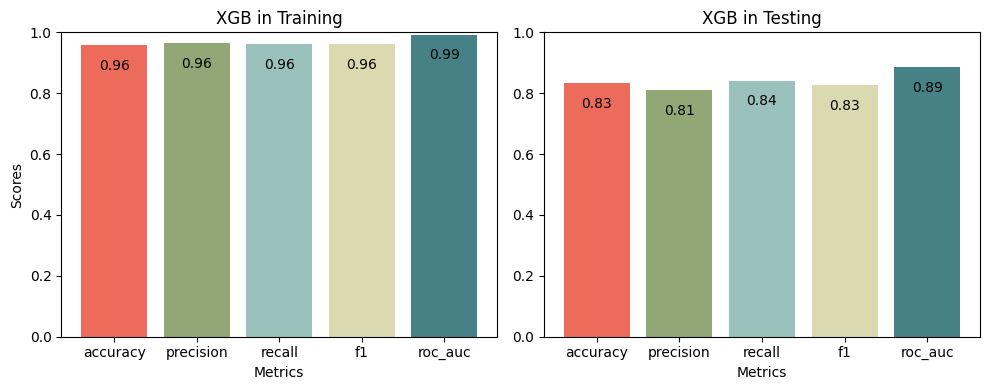

In [ ]:
plot_model_metrics("xgb")

Se puede notar que las mediciones en *training* se encuentran muy parecidas. La única que resalta es el ROC-AUC, la cual es casi perfecta. En cuanto a testing, se puede notar que los valores son muy similares entre ellos. Sigue el comportamiento de que la precisión es la menor, lo cual es consistente con que haya un valor mayor de vinos malos clasificados como buenos.

In [ ]:
roc_auc = metrics.roc_auc_score(y_test_1, y_pred_prob)

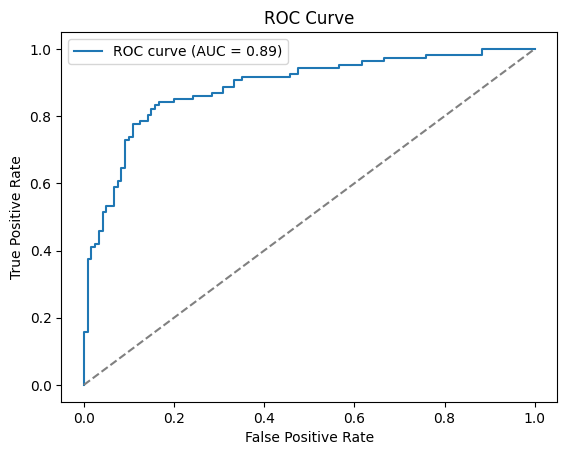

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Por último, se puede notar que la curva ROC-AUC tiene un comportamiento bueno. Es bastante escalonado y se puede apreciar que donde más se aleja del comportamiento perfecto es entre el 0.1 y 0.4 de *False Positive Rate* y el 0.4 y 0.9 de *True Positive Rate*.

In [ ]:
roc_auc_data["xgb"] = {
    "fpr": fpr,
    "tpr": tpr
}

## Benchmark de los modelos aplicados

#### Tabla con resultados

Se va a generar por medio de código la tabla con todos los resultados por medio de un `dataframe`, sacando del diccionario con los resultados las métricas relacionadas al *testing* directamente.

In [ ]:
results_df = pd.DataFrame(model_results['test']).T[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
results_df = results_df.round(2)
results_df.rename(index={'svm':'SVM', 'rf':'RF', 'knn':'KNN', 'gpc':'GPC', 'xgb':'XGB'}, inplace=True)

results_df

accuracy  precision  recall    f1  roc_auc
SVM      0.73       0.69    0.79  0.73     0.80
KNN      0.82       0.77    0.90  0.83     0.91
RF       0.84       0.81    0.85  0.83     0.90
XGB      0.83       0.81    0.84  0.83     0.89
GPC      0.82       0.78    0.88  0.82     0.88

Donde respectivamente:
1. SVM corresponde al Support Vector Machine.
2. RF corresponde al Random Forest.
3. KNN corresponde al K Nearest Neighbors
4. GPC corresponde al Gaussian Process Classifier
5. XGB corresponde al XGBoost

Esto nos permite recolectar los resultados en un solo lugar, pero no nos permite una manera muy simple de interpretarlos. Por esta razón, se van a realizar visualizaciones que nos permitan tener una mejor idea de lo que está ocurriendo con el modelo.

### Gráficos de barras para cada métrica

#### Función para graficar

Se va a utilizar esta función, que recibe como parámetro la métrica que se desea para sacar de nuestra estructura de datos lo que requerimos.

In [ ]:
colors_models = ['#FE7F2D', '#FCCA46', '#A1C181', '#619B8A', '#1F597D']

def plot_models_for_metric(metric_str):
  models = list(model_results['test'].keys())
  metric_values = [model_results['test'][x][metric_str] for x in models]
  models = [x.upper() for x in models]

  bar = plt.bar(models, metric_values, color=colors_models)
  plt.xlabel("Models")
  metric_str = metric_str.capitalize()
  plt.ylabel(metric_str)
  plt.title('Model ' + metric_str + ' Comparison')
  plt.bar_label(bar, fmt='%.2f', label_type='edge', padding=-20)
  plt.ylim(0, 1)
  plt.tight_layout()

#### Accuracy

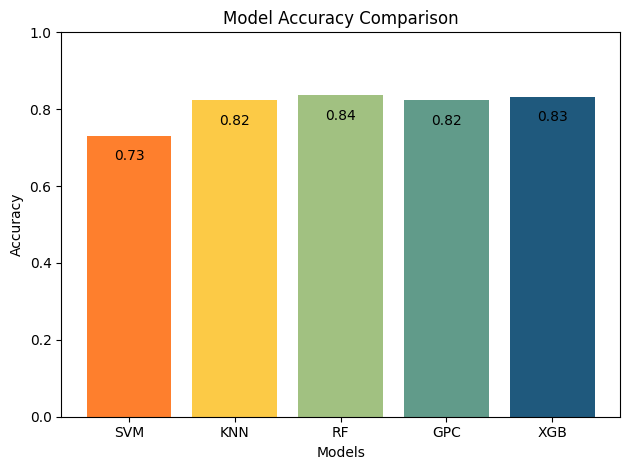

In [ ]:
plot_models_for_metric('accuracy')

El *accuracy* es útil para trabajar sobre clases balanceadas [22], que en este caso estamos cercano a eso. Debido a esta razón, nos resulta una métrica relevante.

Para el *accuracy*, de manera inicial, podemos observar que SVM tiene el peor rendimiento. Este es un patrón que vamos a notar posteriormente para todas las métricas.

Podemos discernir que el problema que se está realizando entonces probablemente no es linealmente separable y ocupamos un modelo de mayor complejidad. Tomando ambas clases en mente, el SVM no tiene el mejor comportamiento.

Dejando el SVM al lado, el Random Forset, KNN, GPC y XGB todos tienen un rendimiento similar para esta métrica, con el RF siendo el mejor de todos.





#### Precision

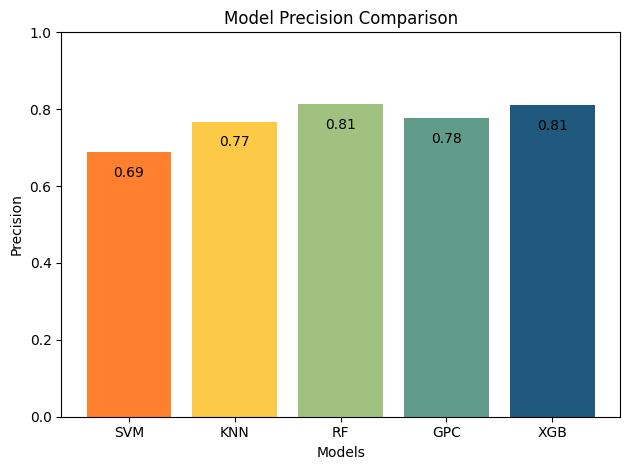

In [ ]:
plot_models_for_metric('precision')

El *precision* nos permite observar qué tan a menudo están las predicciones positivas correctas [22], en nuestro caso esto se refiere al vino de alta calidad.

Este es beneficioso si queremos darle prioridad a alguna de nuestras clases, en específico si el costo de un falso positivo es crítico [22]. Para motivos de nuestros clasificadores en la presente tarea, se considera preferible tomar en cuenta el accuracy sobre el precision.

De nuevo, el SVM presenta el peor rendimiento, podemos ver entonces que es un poco más propenso a producir falsos positivos que el resto de modelos.

En este caso, el RF comparte el mejor rendimiento sobre la métrica junto al XGB.



#### Recall

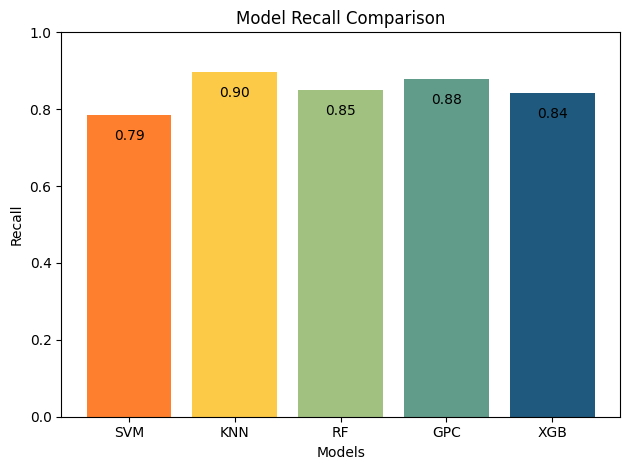

In [ ]:
plot_models_for_metric('recall')

El *recall* mayor lo tiene el KNN y el menor el SVM. Los demás se encuentran parecidos. Esto indica que el KNN es mejor capturando las instancias que son realmente de vinos buenos. También cabe recalcar que el GPC tuvo un muy buen comportamiento también.

#### F1

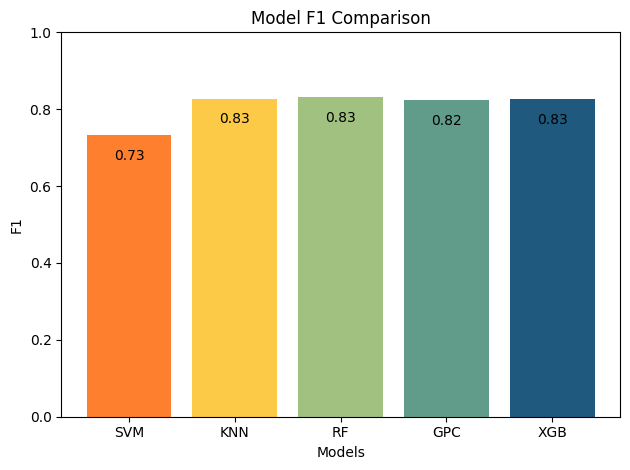

In [ ]:
plot_models_for_metric('f1')

Para este problema, el F1 es una mejor medición que ver *precision* y *recall* por separado, ya que se desea que minimizar los falsos vinos malos y los falsos vinos buenos. El F1 menor fue el SVM, lo cual era esperado ya que tuvo un *underfitting*. En el primer lugar hay un triple empate con KNN, RF y XGB. Estos tres modelos tuvieron un buen balance entre la *precision* y *recall*.

### *Lineplot* para cada métrica

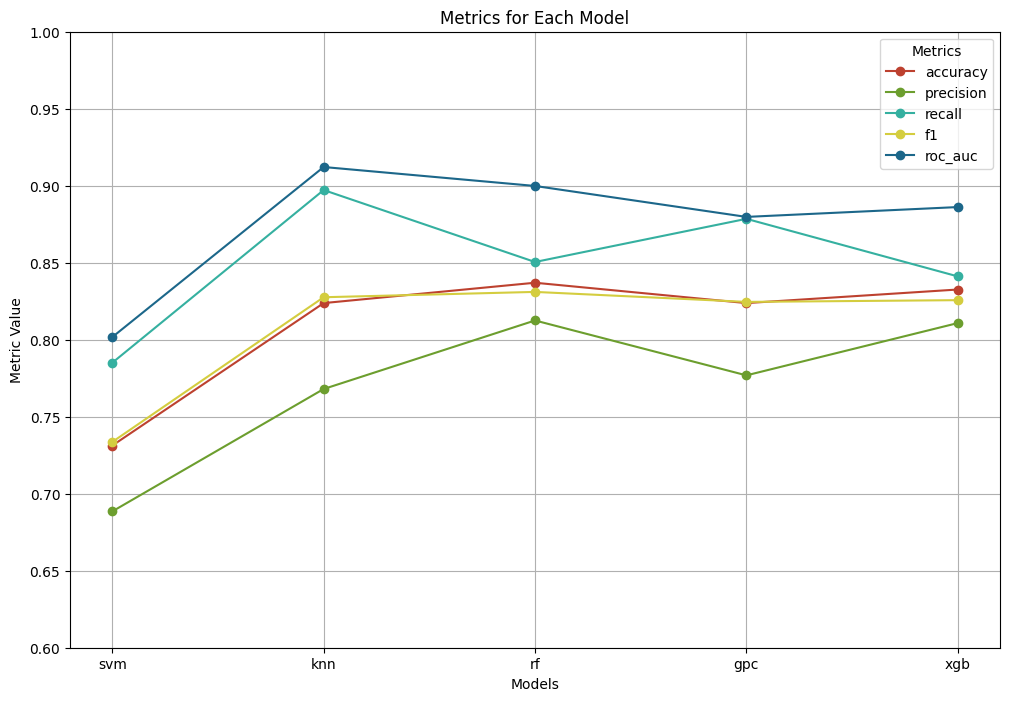

In [ ]:
models = list(model_results['test'].keys())
metric_names = list(model_results['test']['svm'].keys())


plt.figure(figsize=(12, 8))

colors_metrics_strong = ['#bd412f', '#6c9e2e', '#35b0a0', '#d4cd3f', '#1c678a']
for idx, metric in enumerate(metric_names):
    metric_values = [model_results['test'][model][metric] for model in models]
    plt.plot(models, metric_values, marker='o', linestyle='-', label=metric, color=colors_metrics_strong[idx])

plt.title('Metrics for Each Model')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.ylim(0.6, 1)
plt.grid(True)
plt.legend(title='Metrics', loc='best')
plt.show()

Primero, se puede observar que las mediciones de SVM son las menores. Todos sus valores rondan entre `0.70` y `0.80`. Luego, al ver el KNN se puede observar un aumento en todas sus mediciones, especialmente en el *recall* y ROC-AUC.

Al pasar el RF ocurre un comportamiento interesante porque algunas mediciones disminuyen pero otras aumentan. El *recall* tiene una disminución notoria, pero el *accuracy* y *precision* aumentan. Asimismo, se puede notar que el valor F1 se mantiene similar.

En el GPC los valores, en general, disminuyen. La excepción es el *recall* que tiene un aumento. El F1 se mantiene muy parecido. Lo mas destacable es que la meidición de *precision* disminuye significativamente.

Por último, el XGBoost tiene un comportamiento muy similar al RF. El valor de *precision*, *accuracy* y *F1* es visualmente igual. El *recall* del XGBoost es ligeramente menor, así como el ROC-AUC.

### Comparación de gráficos ROC AUC por modelo

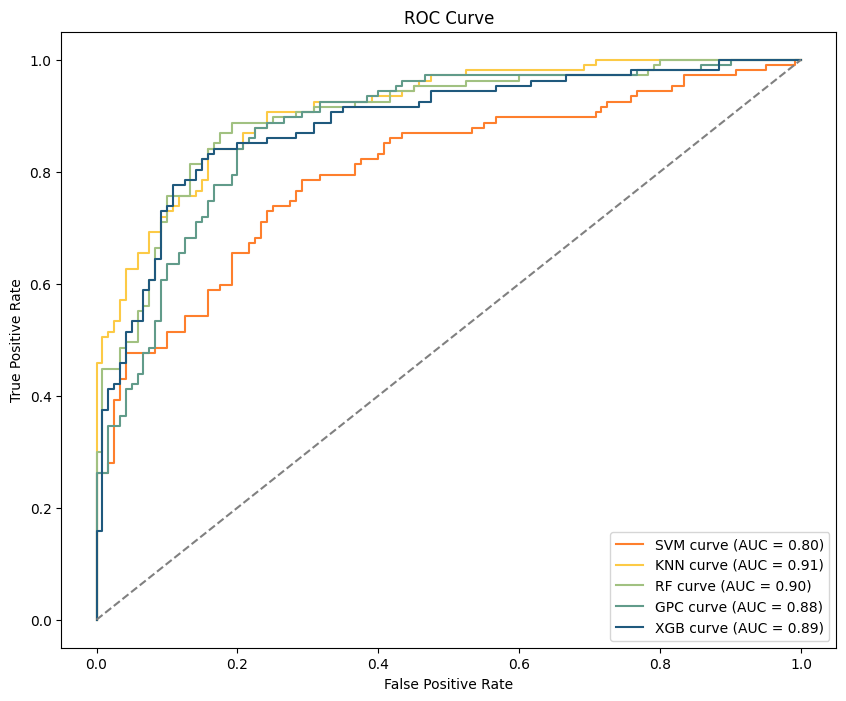

In [ ]:
plt.figure(figsize=(10,8))

# svm
auc = model_results['test']['svm']['roc_auc']
plt.plot(roc_auc_data['svm']['fpr'], roc_auc_data['svm']['tpr'], label=f'SVM curve (AUC = {auc:.2f})', color=colors_models[0])
# knn
auc = model_results['test']['knn']['roc_auc']
plt.plot(roc_auc_data['knn']['fpr'], roc_auc_data['knn']['tpr'], label=f'KNN curve (AUC = {auc:.2f})', color=colors_models[1])
# rf
auc = model_results['test']['rf']['roc_auc']
plt.plot(roc_auc_data['rf']['fpr'], roc_auc_data['rf']['tpr'], label=f'RF curve (AUC = {auc:.2f})', color=colors_models[2])
# gpc
auc = model_results['test']['gpc']['roc_auc']
plt.plot(roc_auc_data['gpc']['fpr'], roc_auc_data['gpc']['tpr'], label=f'GPC curve (AUC = {auc:.2f})', color=colors_models[3])
# xgb
auc = model_results['test']['xgb']['roc_auc']
plt.plot(roc_auc_data['xgb']['fpr'], roc_auc_data['xgb']['tpr'], label=f'XGB curve (AUC = {auc:.2f})', color=colors_models[4])
# random state
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.show()

Las curvas de los modelos son bastante similares, excepto por el SVM. El SVM tiene un curva muy circular y es la más cerana a un modelo que clasifica aleatoriamente. De las demás curvas, se puede observar que el RF es el que tiene una con forma más similar a la L invertida de los ejes, de un modelo de clasificación perfecto. Sin embargo, el mayor valor de ROC-AUC es de KNN con un `0.91`. De este se puede apreciar que es el que más se encuentra sobre el eje-y antes de salirse del comportamiento perfecto.

### Conclusiones y trabajo futuro

Inicialmente, por medio del trabajo realizado se puede identificar que el problema establecido no parece ser linealmente separable ni de complejidad baja. Por esta razón, el modelo SVM deja mucho por desear, ya que no ofrece un desemepeño favorable en la mayoría de las métricas. De igual manera, cabe destacar que su comportamiento tampoco es aleatorio, solo no es el más apropiado observado.



El modelo KNN presenta en *testing* un comportamiento similar en las métricas a los otros, incluso teniendo la mejor área bajo la curva ROC. El único problema es que este se encuentra *overfit*. De lo observado, este modelo se confunde altamente con grandes cantidades de ruido en sus valores.



En el caso del Random Forest, este consistentemente presenta el mejor resultado en la mayoría de métricas. La mayor excepción es el *recall*, donde tiene el tercer mejor resultado. Por motivos de la naturaleza del problema, se busca un mejor balance entre métricas como el *accuracy*, *F1*, y ROC haciendo que este modelo sea favorable sobre los otros.



El Gaussian Process podría ser considerado favorable sobre otros modelos para esta tarea, ya que al observar el *training* no está tan apegado al conjunto de datos y presenta buenas métricas al ser validado. Se presenta ventajoso al trabajar sobre datos estandarizados, pero existe una alta exploración sobre los hiperparámetros que se podría realizar. Hay que tomar en cuenta que la mejor configuración encontrada fue la base, pero podría existir una mejor.




El XGBoost presenta buenos resultados, pero está cercano a estar *overfit*. Se debe tomar en cuenta la problemática de la cantidad de los datos, que podría estar afectando el modelo. Otra desventaja observada es la cantidad de hiperparámetros que posee, donde encontrar una configuración apta para el problema requiere más tiempo de investigación.



Se debe notar que la mayoría de modelos tienen una precisión no tan alta como el resto de métricas. Existe la posibilidad de que esto sea causado por cómo se separó el vino para clear las clases respectivas de vino de alta y baja calidad, donde el punto de corte se realizó por medio de dos clases cercanas en calidad con la mayor cantidad de entradas. Por esta razón, puede ser que los modelos tengan dificultad para separar de manera correcta las predicciones positivas correctas.



Para otra iteración sobre el experimento, se podría *aplicar feature selection* con el propósito de reducir el ruido para los modelos. Una estrategia podría ser probar cómo sale el *benchmark* de los modelos al eliminar los que tengan correlación alta (ya sea positiva o negativa). En otro caso, se podría graficar el *feature importance* de los modelos y observar cuál es relevante para cada uno y seleccionar esos.




Finalmente, dada toda la información recolectada, por sus métricas se considera que el algoritmo Random Forest y el algoritmo XGBoost presentan el mejor rendimiento en el *benchmark*. El SVM presenta el peor rendimiento por la naturaleza de los datos, hasta llegando a un comportamiento asintótico. De igual manera, para que el KNN sea más apropiado, se debería considerar menos *features* para trabajar. Finalmente, aunque el Gaussian Process parece ser prometedor, falta una gama de *kernels* que se pueden probar.



## Bibliografía

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. "Wine Quality," UCI Machine Learning Repository, 2009. [Online]. Available: https://doi.org/10.24432/C56S3T.


[2] M. Maker, “Acid,” Terroir Review, Oct. 31, 2021. https://terroirreview.com/glossary/acid/

[3] A. Mooney, “Why is testing for citric acid important in winemaking?,” Randox Food, Jun. 17, 2019. https://www.randoxfood.com/why-is-testing-for-citric-acid-important-in-winemaking/

[4] M. Puckette, “What is Residual Sugar in Wine? | Wine Folly,” Wine Folly. https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/

[5] OIV, “Level of sodium and chlorides ions in wines,” International Organisation of Vine and Wine. https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis/annex-d/annex-d-advices/level-of-sodium-and-chlorides-ions-in-wines

[6] A. Essary, “Understanding free sulfur dioxide (FSO2) in wine,” Oklahoma State University, Jul. 2024. https://extension.okstate.edu/fact-sheets/understanding-free-sulfur-dioxide-fso2-in-wine.html


[7] M. Moroney, “Total Sulfur Dioxide – Why it Matters, Too!,” Midwest Grape and Wine Industry Institute, Feb. 27, 2018. https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/


[8] Bouchon, “What is the wine fermentation process?,” Bouchon Family Wines. https://bouchonfamilywines.com/en/cual-es-el-proceso-de-fermentacion-del-vino/

[9] GeeksforGeeks, “Support Vector Machine (SVM) algorithm,” GeeksforGeeks, Jul. 04, 2024. https://www.geeksforgeeks.org/support-vector-machine-algorithm/

[10] E. Academy, “What is the purpose of the C parameter in SVM? How does a smaller value of C affect the margin and misclassifications? - EITCA Academy,” EITCA Academy, Aug. 07, 2023. https://eitca.org/artificial-intelligence/eitc-ai-mlp-machine-learning-with-python/support-vector-machine/svm-parameters/examination-review-svm-parameters/what-is-the-purpose-of-the-c-parameter-in-svm-how-does-a-smaller-value-of-c-affect-the-margin-and-misclassifications/

[11] D. C. Blog, “Understanding F1 score, accuracy, ROC-AUC & PR-AUC metrics,” Deepchecks, Jun. 17, 2024. https://deepchecks.com/f1-score-accuracy-roc-auc-and-pr-auc-metrics-for-models/

[12] GeeksforGeeks, “KNeArest Neighbor(KNN) algorithm,” GeeksforGeeks, Jul. 15, 2024. https://www.geeksforgeeks.org/k-nearest-neighbours/

[13] “KNeighborsClassifier,” Scikit-learn. https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[14] “GridSearchCV,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

[15] GeeksforGeeks, “Random Forest algorithm in machine learning,” GeeksforGeeks, Jul. 12, 2024. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

[16] “RandomForestClassifier,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[17] GeeksforGeeks, “Gaussian Process Classification (GPC) on Iris Dataset,” GeeksforGeeks, Dec. 09, 2023. https://www.geeksforgeeks.org/gaussian-process-classification-gpc-on-iris-dataset/

[18] “GaussianProcessClassifier,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier

[19] GeeksforGeeks, “XGBoost,” GeeksforGeeks, Feb. 06, 2023. https://www.geeksforgeeks.org/xgboost/

[20] “XGBoost Parameters — xgboost 2.1.1 documentation.” https://xgboost.readthedocs.io/en/stable/parameter.html

[21] Prashant, “A Guide on XGBoost hyperparameters tuning,” Kaggle, Jul. 15, 2020. https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

[22] “Accuracy vs. precision vs. recall in machine learning: what’s the difference?” https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall